(examples)=
# Examples of random variables

I want to begin by returning to a discussion we had in the chapter on [probability spaces](big-pic-1).

One of the goals of applied mathematics is to use mathematical models to represent real-world scenarios. Of course, no real-world scenario comes packaged together with a preferred mathematical model. Nature or the Universe doesn't somehow tell you which model to use---rather, it is up to *you* to choose what you believe is the most appropriate model.

Making a good choice requires lots of experience and theoretical knowledge, but it also requires you to have a wide knowledge of the various models that are out there. So, as you go along in your studies, you'll want to build up a library of models that you know a lot about, so that when you're confronted with a new scenario out in the real world, the chances are high that you know the perfect model. Think of it as "filling your toolkit."

In this section, we will begin studying different families of probability distributions for discrete and continuous random variables. Think of these distributions as *probabilistic (or statistical) mathematical models* that you would be able to use later on, if you ever need them:

```{image} ../img/whichone.svg
:width: 65%
:align: center
```
&nbsp;

Notice that I referred to these probability distributions as belonging to *families*. Indeed, each of the types of distributions that we will study in this chapter contain *infinitely many* individual probability distributions. What distinguishes the distributions amongst each other in each family are different *parameter* settings. For example, we will learn that there is an individual *Bernoulli probability distribution* for each real number $p$ between $0$ and $1$ (inclusive). In technical jargon, we would therefore say that the Bernoulli distributions are *parametrized* by $p$.

Families of probability distributions may need more than one parameter in order to be completely specified. For example, as we will see, *hypergeometric distributions* actually require *three* parameters.

So, if you're confronted with a real-world scenario, and you decide to model it using one of the types of distributions that we learn about in this chapter, you would then *also* need to choose the correct parameter setting within your chosen type. Determining (or estimating) the correct parameters is often done with the aid of data, and this process is one of the central topics of _inferential statistics_ that we will study in much more detail in later chapters.

---

In this chapter, (most of) the descriptions of the families of probability distributions will follow the same pattern:

1. I will begin by defining the distributions in abstract, purely mathematical terms. This includes a description of the parameters of the distributions as well as formulas for the probability mass and density functions.

2. I will show you several plots of probability mass and density functions, to help convey how different parameter settings affect the shapes of the distributions.

3. I will describe an archetypical real-world scenario in which the family of distributions naturally arises. These scenarios will help explain the abstract definitions.

4. I will give you formulas for the expectations and variances.

5. Interspersed between the first four steps are various comments, remarks, and miscellaneous facts, as well as Problem Prompts pointing to the worksheet.

As you read through the sections below, you will notice that the probability spaces $S$ that serve as the domains of random variables $X:S\to \mathbb{R}$ have all but disappeared. They haven't completely gone away, of course, since whenever we talk about random variables they are there lurking in the background. But this is typical of a course at this level---the probability spaces recede, and random variables take their place as the main objects of study.

Just three more items before we begin:

```{note}
1. All the distributions below will be defined via their probability mass and density functions. However, I will _not_ prove that these alleged mass and density functions actually _are_ valid mass and density functions by showing they sum and integrate to $1$, are non-negative, *etc*. I will leave these tasks to the reader to carry out on their own, or to look up in appropriate references.

2. Though the list of distributions in this chapter is long, it is not exhaustive! We will meet other types of distributions later, like the $\chi^2$, $t$, and $F$ distributions. And beyond this course, there are lots and _lots_ more distributions out there---take a look at all the distributions [implemented](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions) in SciPy, for example!


3. If $X:S\to \mathbb{R}$ is either a discrete or continuous random variable with mass function $p(x)$ or density function $f(x)$, then we shall define the _support_ of $X$ to be the support of either $p(x)$ or $f(x)$ (whichever is applicable). This is technically an incorrect usage of terminology, since the support of $X$ is already defined as the (closure of the) set of those sample points $s\in S$ such that $X(s)\neq 0$. However, this usage coincides with common usage in the statistical literature.
```









## Bernoulli distributions

Our first family of distributions are certainly the simplest. But don't let their simplicity fool you---we will see soon enough that they are *very* important, since they sometimes occur as the "building blocks" of more complicated and complex distributions!


```{prf:definition}
:label: bernoulli-def

Let $\theta$ be a real number with $0\leq \theta \leq 1$. A discrete random variable $X$ is said to have a *Bernoulli distribution* with parameter $\theta$, denoted

$$
X \sim \mathcal{B}er(\theta),
$$ (dist-eqn)

if its probability mass function is given by

$$
p(x;\theta) = \theta^x(1-\theta)^{1-x}.
$$ (bern-eqn)

with support $\{0,1\}$.
```

The notation {eq}`dist-eqn` is shorthand for: "The random variable $X$ has a Bernoulli distribution with parameter $\theta$." The symbol "$\sim$" simply means "is distributed as." The "thing" $\mathcal{B}er(\theta)$ doesn't really have any sort of existence of its own outside this notation, though sometimes people treat it as if it were the probability mass function, or the distribution function, or whatever. In any case, this is incredibly helpful notation and can be used in many ways to shorten the amount that we need to write.

The outputs of a Bernoulli random variable consist of just two values, $0$ and $1$. For that reason, Bernoulli random variables might also be called *binary* random variables.

Since $x$ can be only $0$ or $1$, this means that the formula {eq}`bern-eqn` for the probability mass function could equally be re-written as

$$
p(x;\theta) = \begin{cases} \theta & : x=1, \\ 1-\theta & : x=0.\end{cases}
$$ (bern2-eqn)

Therefore, a random variable $X\sim \mathcal{B}er(\theta)$ outputs the value $1$ with probability $\theta$, and the value $0$ with probability $1-\theta$. Using this fact, I bet you would have no problem drawing probability histograms for various settings for $\theta$. Here's what you would get:

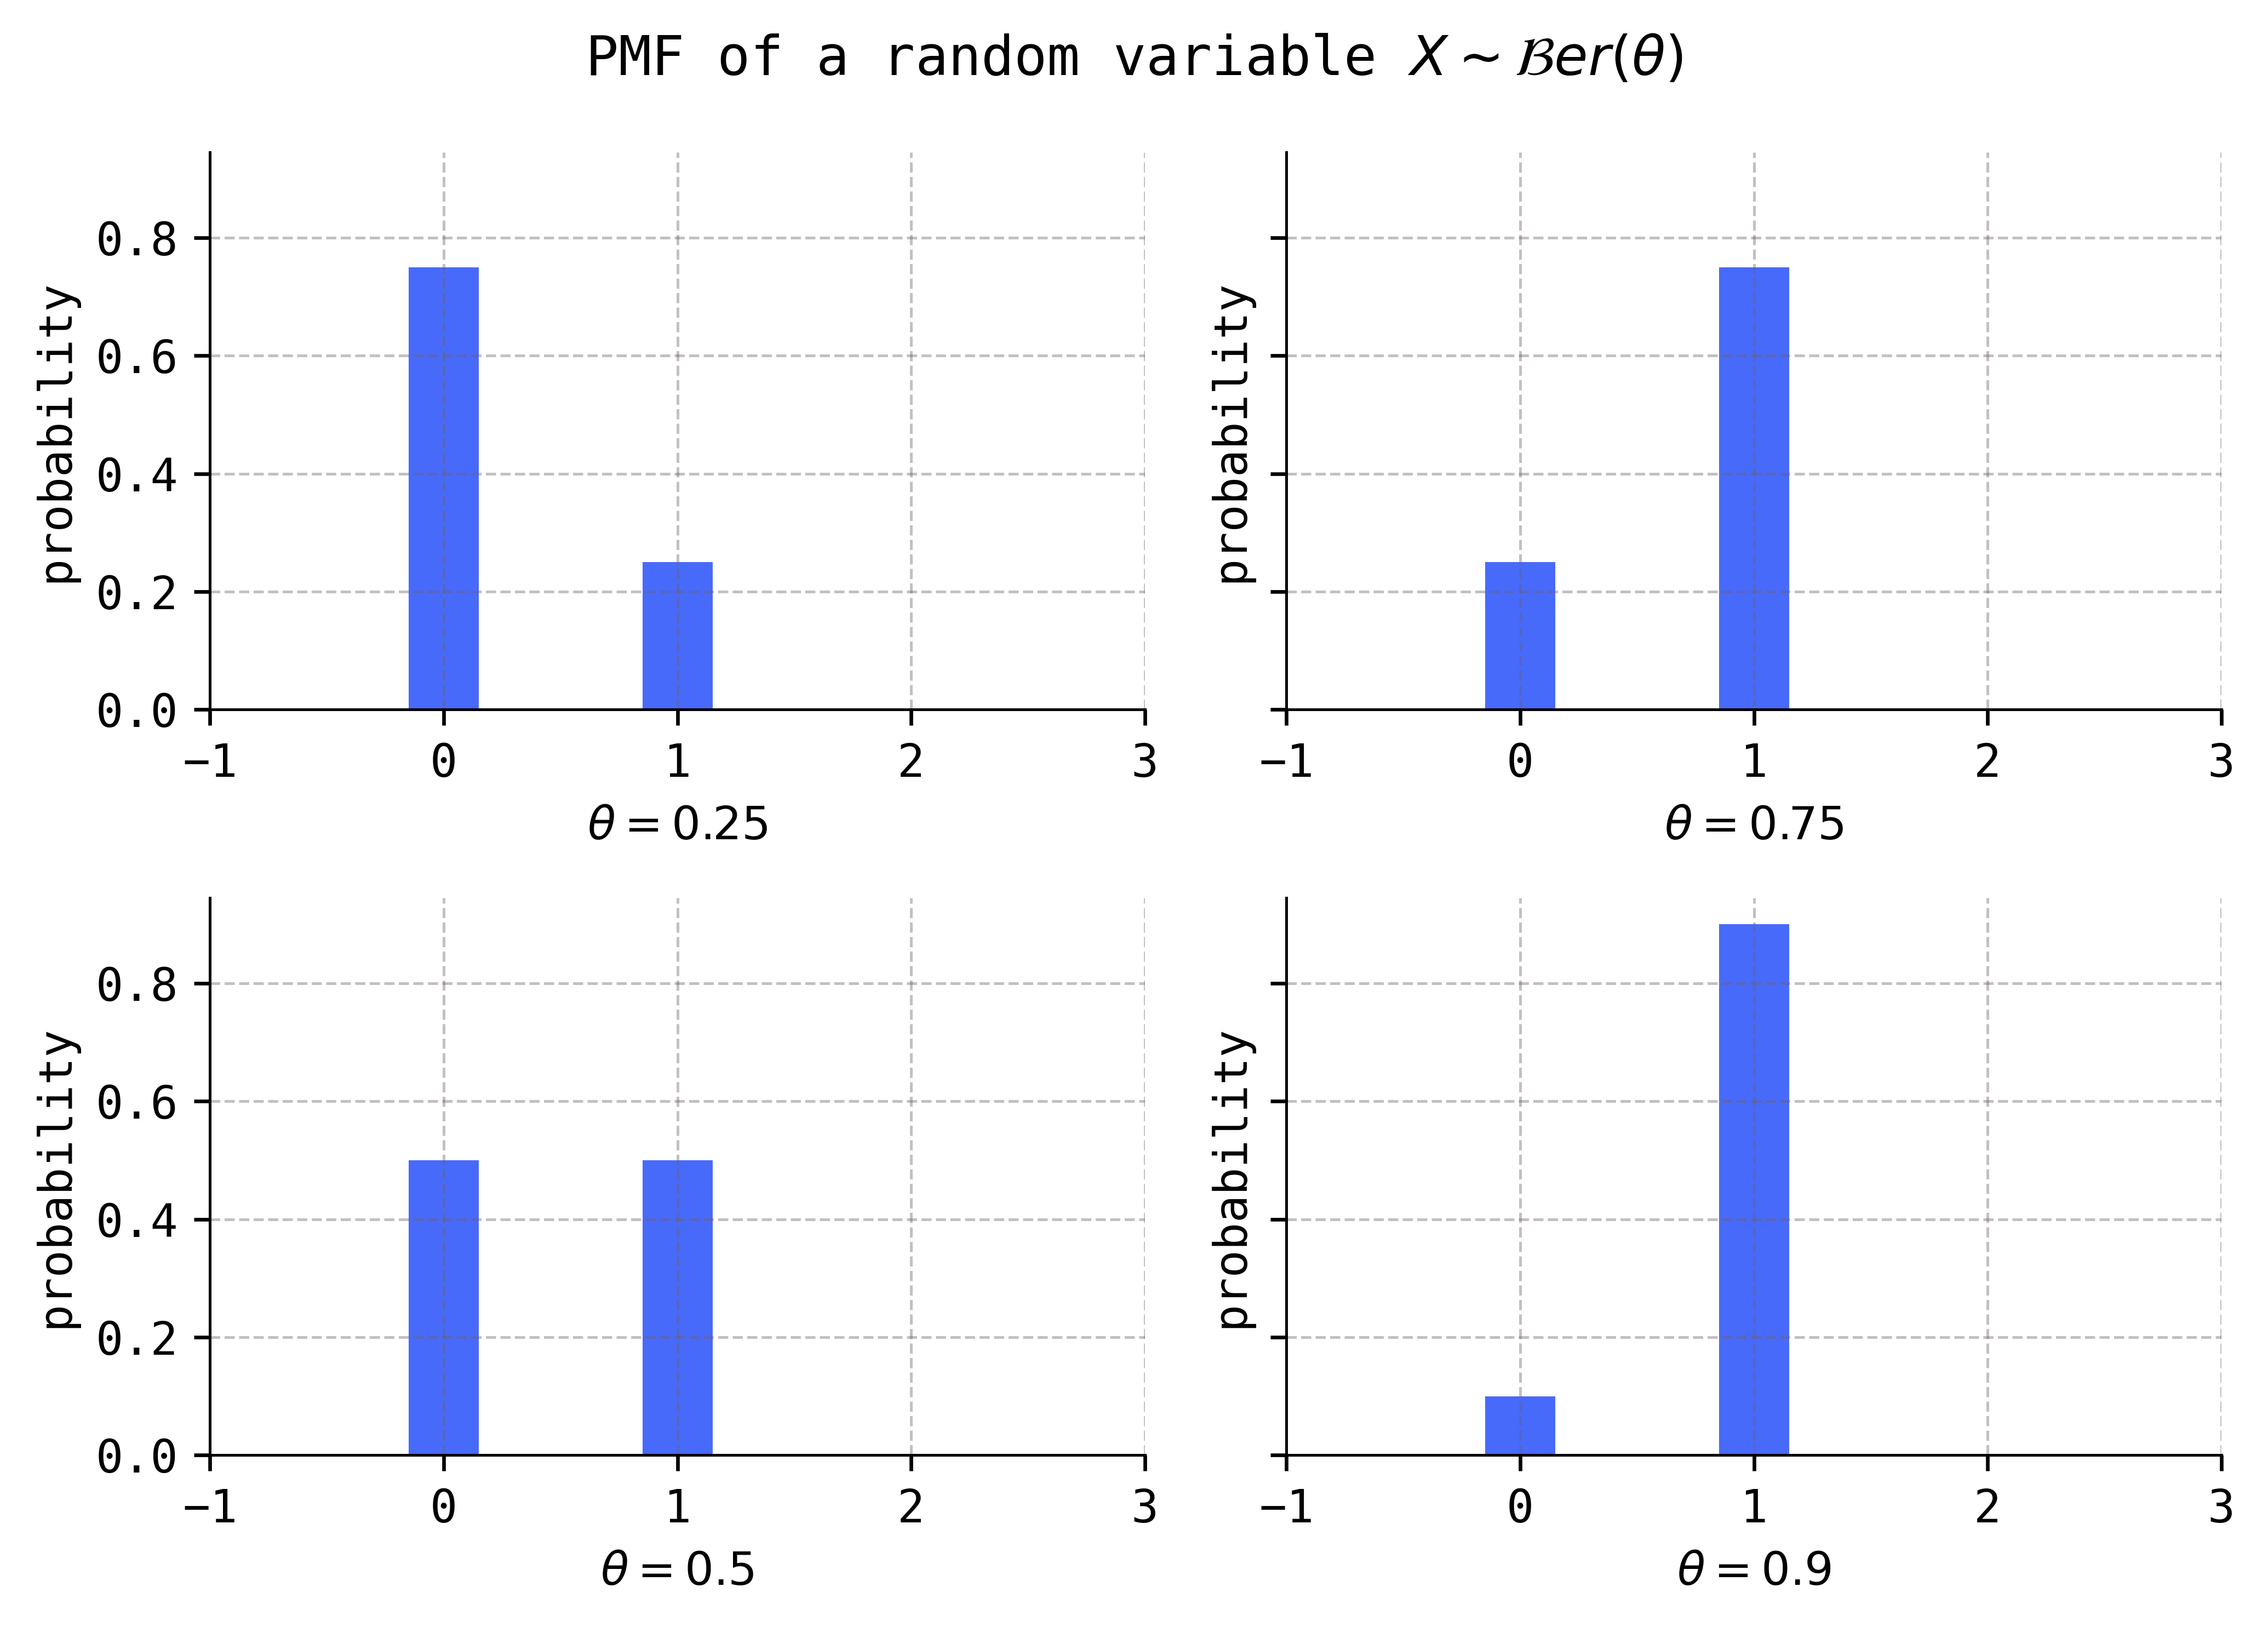

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
import scipy as sp
from itertools import product
from cycler import cycler
plt.style.use('../aux-files/custom_style_light.mplstyle')
mpl.rcParams['figure.dpi'] = 600

params = [[0.25, 0.75], [0.50, 0.90]]
support = [0, 1]

fig, axes = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(7, 5))

for i, j in product(range(2), repeat=2):
    theta = params[i][j]
    X = sp.stats.bernoulli(p=theta)
    
    axes[i, j].bar(support, X.pmf(support), width=0.3)
    axes[i, j].set_ylabel('probability')
    axes[i, j].set_xlim(-1, 3)
    axes[i, j].set_xlabel(fr'$\theta={theta}$')

fig.suptitle(r'PMF of a random variable $X\sim \mathcal{B}er(\theta)$')
plt.tight_layout()

Notice that different values of the parameter $\theta$ fundamentally alter the _shape_ of the distribution. For this reason, the parameter $\theta$ is often called the _shape parameter_ for Bernoulli distributions.

In what sort of real-world scenario would Bernoulli random variables naturally occur? Here's one:

```{admonition} An archetypical Bernoulli scenario  

**Q**: Suppose that a coin is flipped once and $X$ is the number of heads obtained. Suppose further that we allow for the possibility that the coin is *loaded*, so that it lands heads with probability $\theta$ (which may not be $0.5$!). What is the distribution of the random variable $X$?

**A**: $X\sim \mathcal{B}er(\theta)$.
```

It's pretty obvious that $X$ is distributed as a Bernoulli random variable, right? After all, since $X$ is the number of heads obtained after *one* flip, there are only two options: $0$ or $1$. Moreover, they are *telling us* that $X=1$ occurs with probability $\theta$, and therefore $X=0$ must occur with whatever probability is "left over," which is exactly $1-\theta$. So, the probability function of $X$ must be {eq}`bern2-eqn`, which means $X\sim \mathcal{B}er(\theta)$ by definition.

Clearly, any scenario which results in a binary outcome with fixed probabilities may be modeled using a Bernoulli random variable. We will explore a few such scenarios in the worksheet problems when we get to the Problem Prompt below. But first, let's state the expectations and variances of Bernoulli variables:

```{prf:theorem} Expectations and variances of Bernoulli variables
:label: exp-var-bernoulli-thm

If $X\sim \mathcal{B}er(\theta)$, then

$$
E(X) = \theta \quad \text{and} \quad V(X) = \theta (1-\theta). 
$$
```

The proofs of these equalities are mere trivialities: For the expectation, we have

$$
E(X) = 0\cdot(1-\theta) + 1\cdot \theta = \theta,
$$

while for the variance we have

$$
V(X) = E(X^2) - E(X)^2 = 0^2 \cdot (1-\theta) + 1^2 \cdot \theta - \theta^2 = \theta (1-\theta).
$$

Notice, in particular, that the mean of a variable $X\sim \mathcal{B}er(\theta)$ is the parameter $\theta$. So, it is accurate to say that Bernoulli random variables are parametrized by their means. We will see that this is *also* true for a few other families of random variables besides the Bernoulli random variables.











## Binomial distributions

Next come distributions whose probability mass functions look a lot like the probability functions of Bernoulli random variables.

```{prf:definition}
:label: binomial-def

Let $n\geq 0$ be an integer and let $\theta$ be a real number with $0\leq \theta \leq 1$. A discrete random variable $X$ is said to have a *binomial distribution* with parameters $n$ and $\theta$, denoted

$$
X \sim \mathcal{B}in(n,\theta),
$$

if its probability mass function is given by

$$
p(x;n,\theta) = \binom{n}{x}\theta^x (1-\theta)^{n-x}
$$

with support $\{0,1,\ldots,n\}$.
```

Notice that these distributions require *two* parameters to describe them. Notice also that a random variable $X \sim \mathcal{B}in(1,\theta)$ is nothing but a Bernoulli random variable! Thus, technically, the class of binomial random variables includes the class of Bernoulli ones.

Here are some probability histograms, for various settings of the parameters:

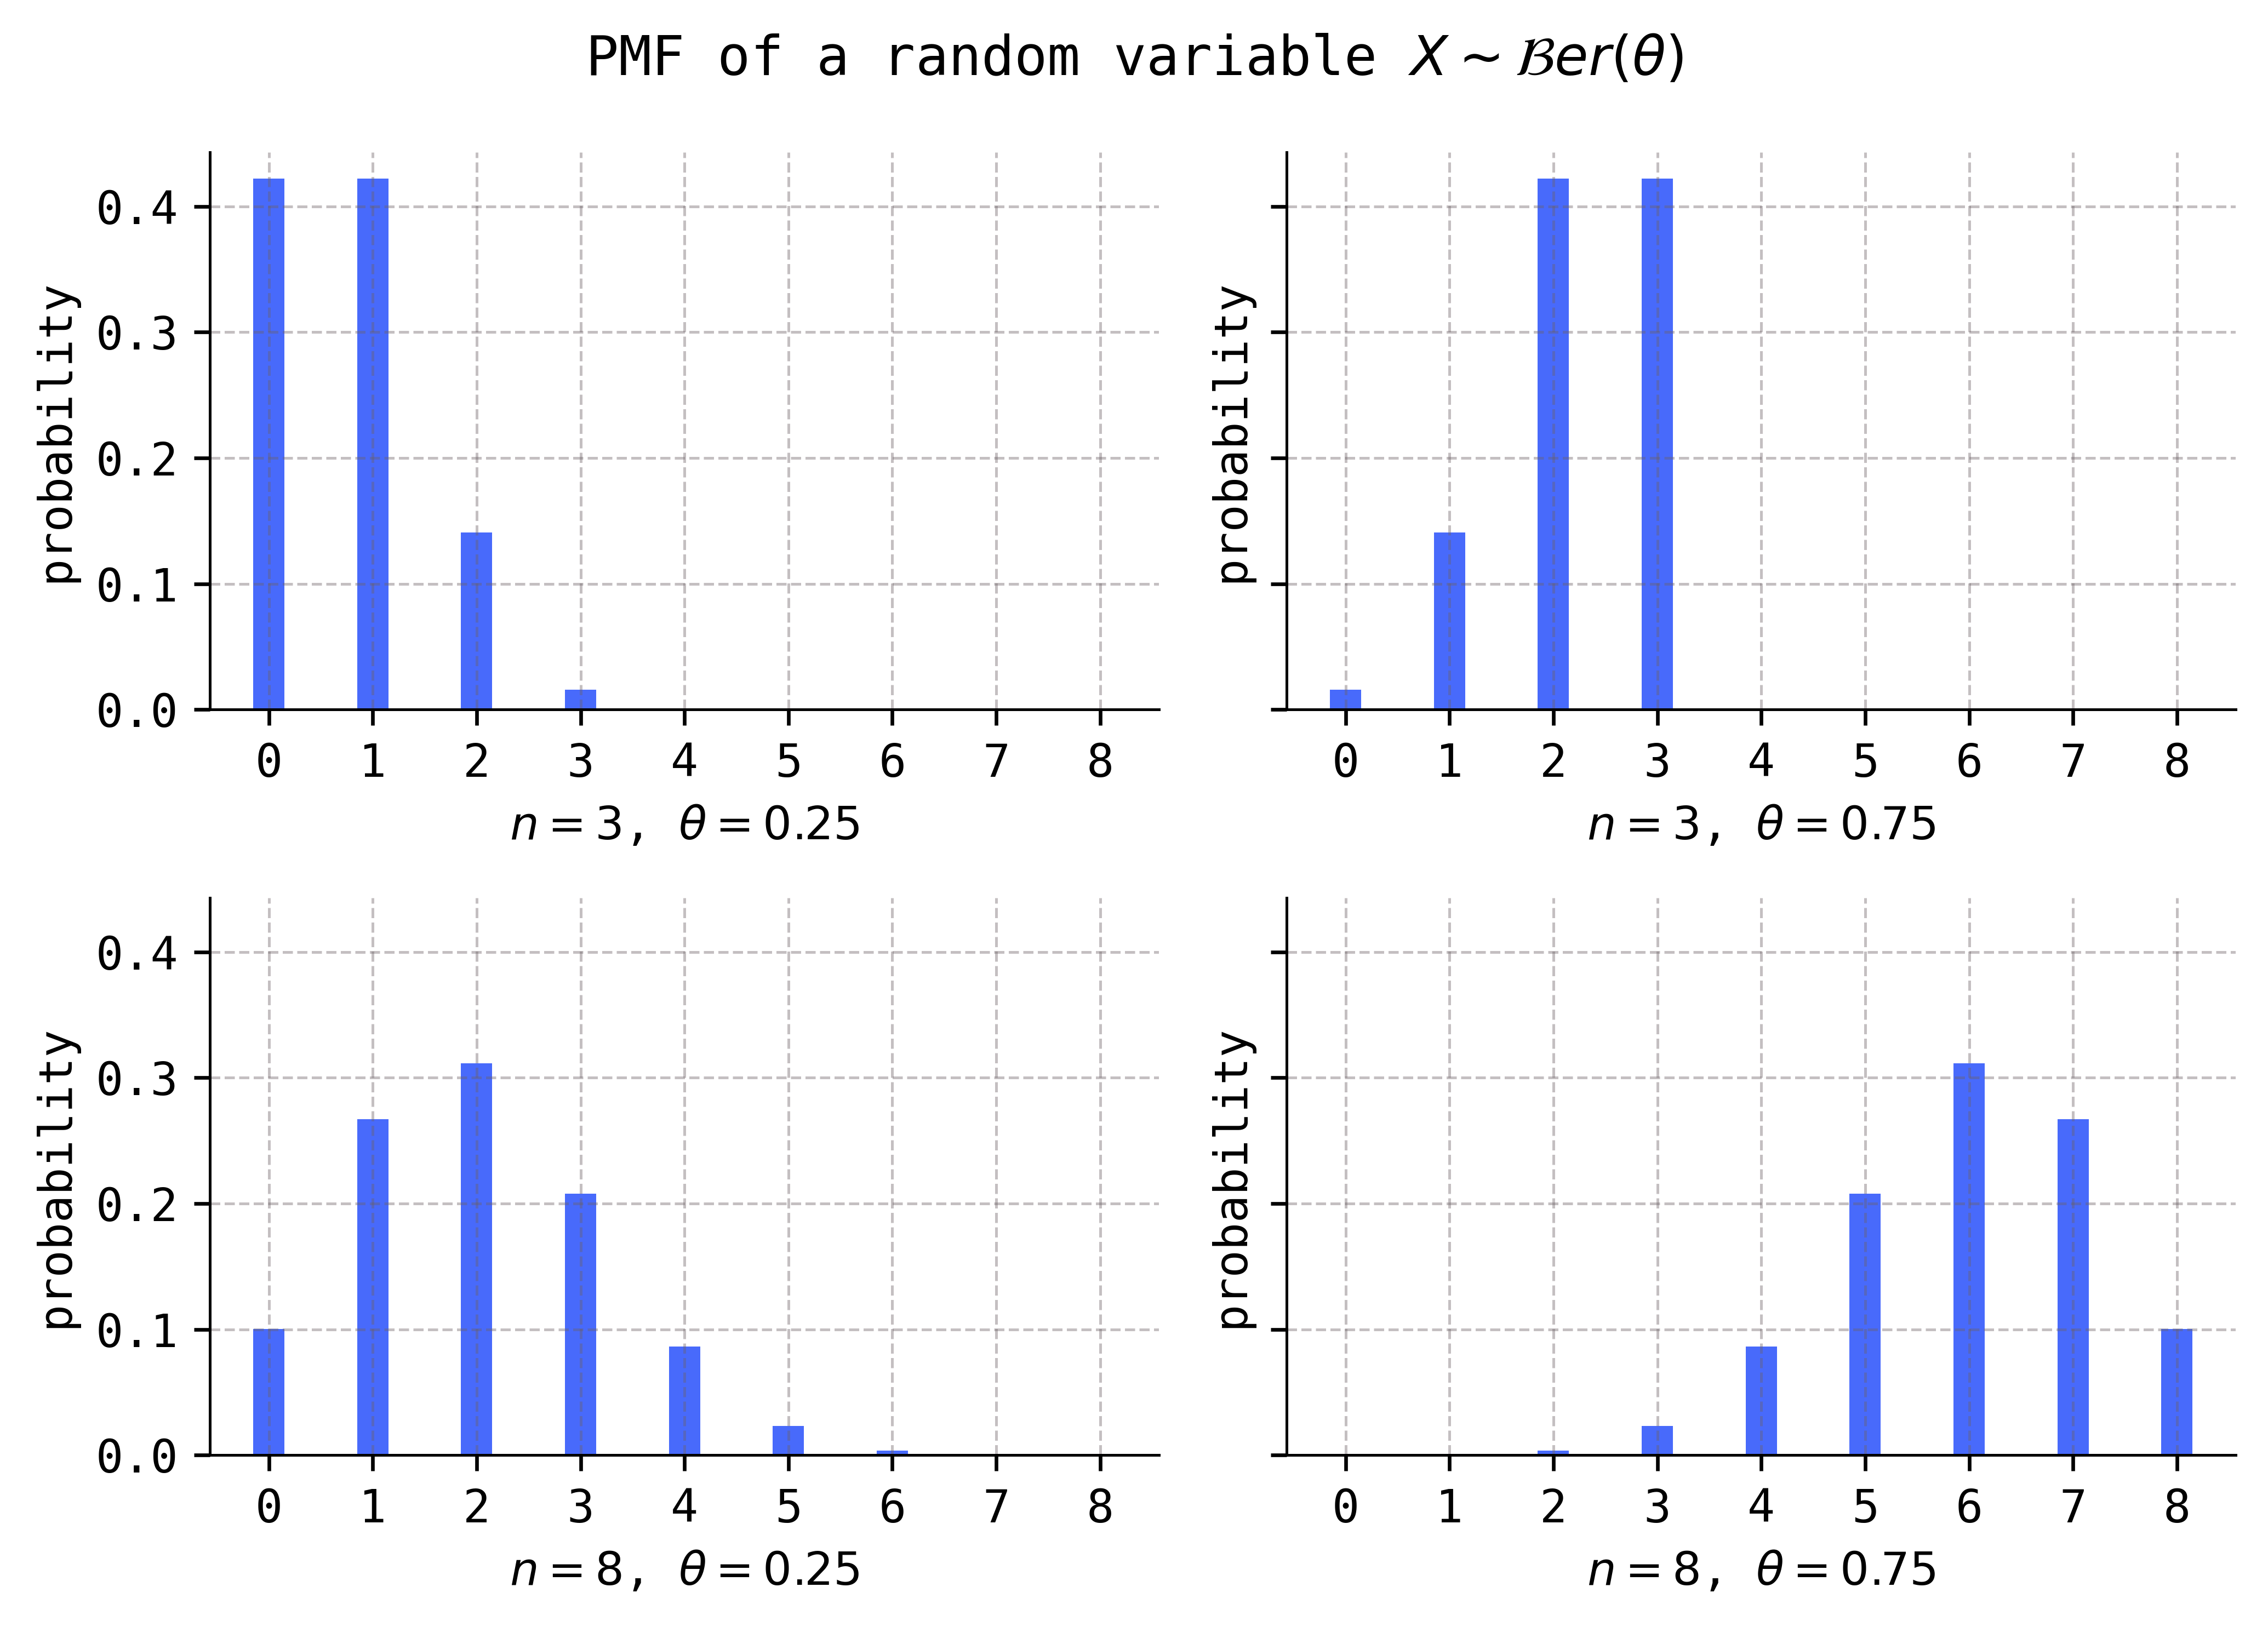

In [2]:
params = [[(3, 0.25), (3, 0.75)], [(8, 0.25), (8, 0.75)]]
support = np.arange(0, 9)

fig, axes = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(7, 5))

for i, j in product(range(2), repeat=2):
    n = params[i][j][0]
    theta = params[i][j][1]
    X = sp.stats.binom(n=n, p=theta)
    
    axes[i, j].bar(support, X.pmf(support), width=0.3)
    axes[i, j].set_ylabel('probability')
    axes[i, j].set_xticks(support)
    axes[i, j].set_xlabel(fr'$n={n}$, $\theta={theta}$')

fig.suptitle(r'PMF of a random variable $X\sim \mathcal{B}er(\theta)$')
plt.tight_layout()

Increasing the $n$ parameter increases the size of the support of $X\sim \mathcal{B}in(n,\theta)$, which generally spreads out the distribution (increases its variance). Larger values of $\theta$ tend to push the mean of $X$ toward the larger numbers in its support. Both $n$ and $\theta$ are called _shape parameters_ of the binomial distributions.

```{admonition} An archetypical binomial scenario

**Q**: Suppose that a coin is flipped $n$ times and that each flip is independent of the others. Suppose further that we allow for the possibility that the coin is *loaded*, so that it lands heads with probability $\theta$ (which may not be $0.5$!). If $X$ is the number of heads obtained, what is the distribution of the random variable $X$?

**A**: $X\sim \mathcal{B}in(n,\theta)$.
```

The sample space $S$ on which $X$ is defined consists of all $n$-tuples of the form

$$
(H, T, H, H, T, \ldots, H, T),
$$ (tuple-eqn)

which represent the result after flipping the coin $n$ times. If there are $x$ heads in this $n$-tuple, then the probability of obtaining this particular sequence is

$$
P(\text{the particular sequence above}) = \theta^x(1-\theta)^{n-x}.
$$

Indeed, this follows from the Product Rule for Probability, since the flips are independent of each other, and we obtain $H$ with probability $\theta$ and $T$ with probability $1-\theta$. It follows that

$$
P(X=x) = m \theta^x(1-\theta)^{n-x},
$$

where $m$ is the total number of $n$-tuples {eq}`tuple-eqn` with $x$ heads. To compute $m$, we simply note that an $n$-tuple {eq}`tuple-eqn` with $x$ heads is uniquely specified by the (left-to-right) positions of the $H$'s. For example, in {eq}`tuple-eqn`, an $H$ occupies positions $1$, $3$, $4$, and so on. So, to specify an $n$-tuple, from all possible $n$ positions we need to choose $x$ of them for the $H$'s. But there are exactly $\binom{n}{x}$ many ways to make these choices, and hence $m = \binom{n}{x}$, which is what we wanted to prove. Thus, $X$ is indeed a $\mathcal{B}in(n,p)$ random variable.

Beyond just flipping coins, binomial random variables may be used to model any scenario which consists of a finite sequence of repetitions of some scenario with independent binary outcomes with fixed probabilities. Such scenarios are even called *binomial experiments* in many textbooks. We will explore additional scenarios in the Problem Prompt below.

Let's now give the expectations and variances of binomial variables:

```{prf:theorem} Expectations and variances of binomial variables
:label: exp-var-binomial-thm

If $X\sim \mathcal{B}in(n,\theta)$, then

$$
E(X) = n\theta \quad \text{and} \quad V(X) = n\theta (1-\theta). 
$$ (bin-exp-eqn)
```

One can derive these expressions directly from the definitions of expectations and variances, but the computations are a little tedious; see Section 3.4 in {cite}`Wackerly2014`, for example. But they may also be obtained with a little more ease by using gadgets called *moment generating functions*, which we will explore [later](mgf). Thus, we will postpone the derivations until then.

From {eq}`bin-exp-eqn`, you can see that $E(X)$ is jointly proportional to $n$ and $\theta$, so that increasing one (while holding the other fixed) increases the mean. The variance $V(X)$ is *also* proportional to $n$, so that increasing $n$ (while holding $\theta$ fixed) also increases the spread of the distribution. These are confirmations of what we saw in the probability histograms above. 

Before moving on to the Problem Prompt, I want to give a useful result that we will use in a later section: Under certain circumstances, Bernoulli random variables may be used to "build" binomial random variables. These "certain circumstances" reach a bit beyond the theory that we currently know, since they refer to [*independence*](independence) of random variables, which is a topic we haven't discussed yet. This latter concept, in turn, relies upon [*joint distributions*](random-vectors), which we also haven't talked about yet. Nevertheless, these concepts are used so lightly that I believe the gist of the proof remains intelligible.

This being said, if you want to skip the proof and take the result on faith, that's fine with me. Just be aware that *independence* of random variables will return in full force a little later on. In fact, this will be our first encounter with a so-called *independent and identically distributed* (IID) sequence of random variables, which will be *very* important in [future sections](theory-to-practice).

```{prf:theorem} Binomial variables as sums of Bernoulli variables
:label: bern-bin-thm

Let $Y_1,Y_2,\ldots,Y_n$ be a sequence of independent Bernoulli variables, all with the same distribution $\mathcal{B}er(\theta)$. Then the random variable

$$
X = Y_1 + Y_2 + \cdots + Y_n
$$

is a $\mathcal{B}in(n,\theta)$ random variable.
```

To prove that $X \sim \mathcal{B}in(n,\theta)$, we need to prove that

$$
P(X=x) = \binom{n}{x} \theta^x (1-\theta)^{n-x}, \quad \text{for } x=0,1,\ldots,n.
$$

However, we have

\begin{align*}
P(X=x) &= P(Y_1 + \cdots + Y_n = x) \\
&= \sum_{y_1+\cdots + y_n=x} P(Y_1=y_1, Y_2=y_2, \ldots , Y_n = y_n),
\end{align*}

where the sum runs over all numbers $y_1,\ldots,y_n$ such that $0\leq y_1,\ldots,y_n\leq 1$ and $y_1+\cdots + y_n = x$. The commas in the joint probability

$$
P(Y_1=y_1, Y_2=y_2, \ldots , Y_n = y_n)
$$ (joint-eqn)

represent the word "and," so that this is the probability that

$$
Y_1 = y_1, \quad \textbf{and} \quad Y_2 = y_2, \quad \textbf{and} \quad \textit{etc}.
$$

Now, since the Bernoulli variables $Y_k$ are independent, the probability {eq}`joint-eqn` factors as

$$
P(Y_1=y_1, Y_2=y_2, \ldots , Y_n = y_n) = P(Y_1=y_1)P(Y_2=y_2) \cdots P(Y_n=y_n).
$$

But each $Y_k\sim \mathcal{B}er(\theta)$, so that, returning to $P(X=x)$, we get:

\begin{align*}
P(X=x) &= \sum_{y_1+\cdots + y_n=x} \theta^{y_1}(1-\theta)^{1-y_1} \theta^{y_2}(1-\theta)^{1-y_2} \cdots \theta^{y_n} (1-\theta)^{1-y_n} \\
&= \sum_{y_1+\cdots + y_n=x} \theta^x(1-\theta)^{n-x}.
\end{align*}

But, given an integer $x$ with $0\leq x\leq n$, how many ways can we write $x=y_1+\cdots + y_n$ where each $y_k$ is either $0$ or $1$? Exactly $\binom{n}{x}$ many ways! Thus, we have

$$
P(X=x) = \binom{n}{y} \theta^x (1-\theta)^{n-x},
$$

as desired.


```{admonition} Problem Prompt

Do problems 1 and 2 on the worksheet.
```













## Geometric distributions

The supports of Bernoulli and binomial random variables are finite. Now, we turn our attention toward a class of random variables with countably infinite supports:

```{prf:definition}
:label: geometric-def

Let $\theta$ be a real number with $0\leq \theta \leq 1$. A discrete random variable $X$ is said to have a *geometric distribution* with parameter $\theta$, denoted

$$
X \sim \mathcal{G}eo(\theta),
$$

if its probability mass function is given by

$$
p(x;\theta) = \theta (1-\theta)^{x-1}.
$$

with support $\{1,2,\ldots\}$.
```

So, we're back to distributions that are parametrized by a single parameter. For different settings of $\theta$, here are some probability histograms:

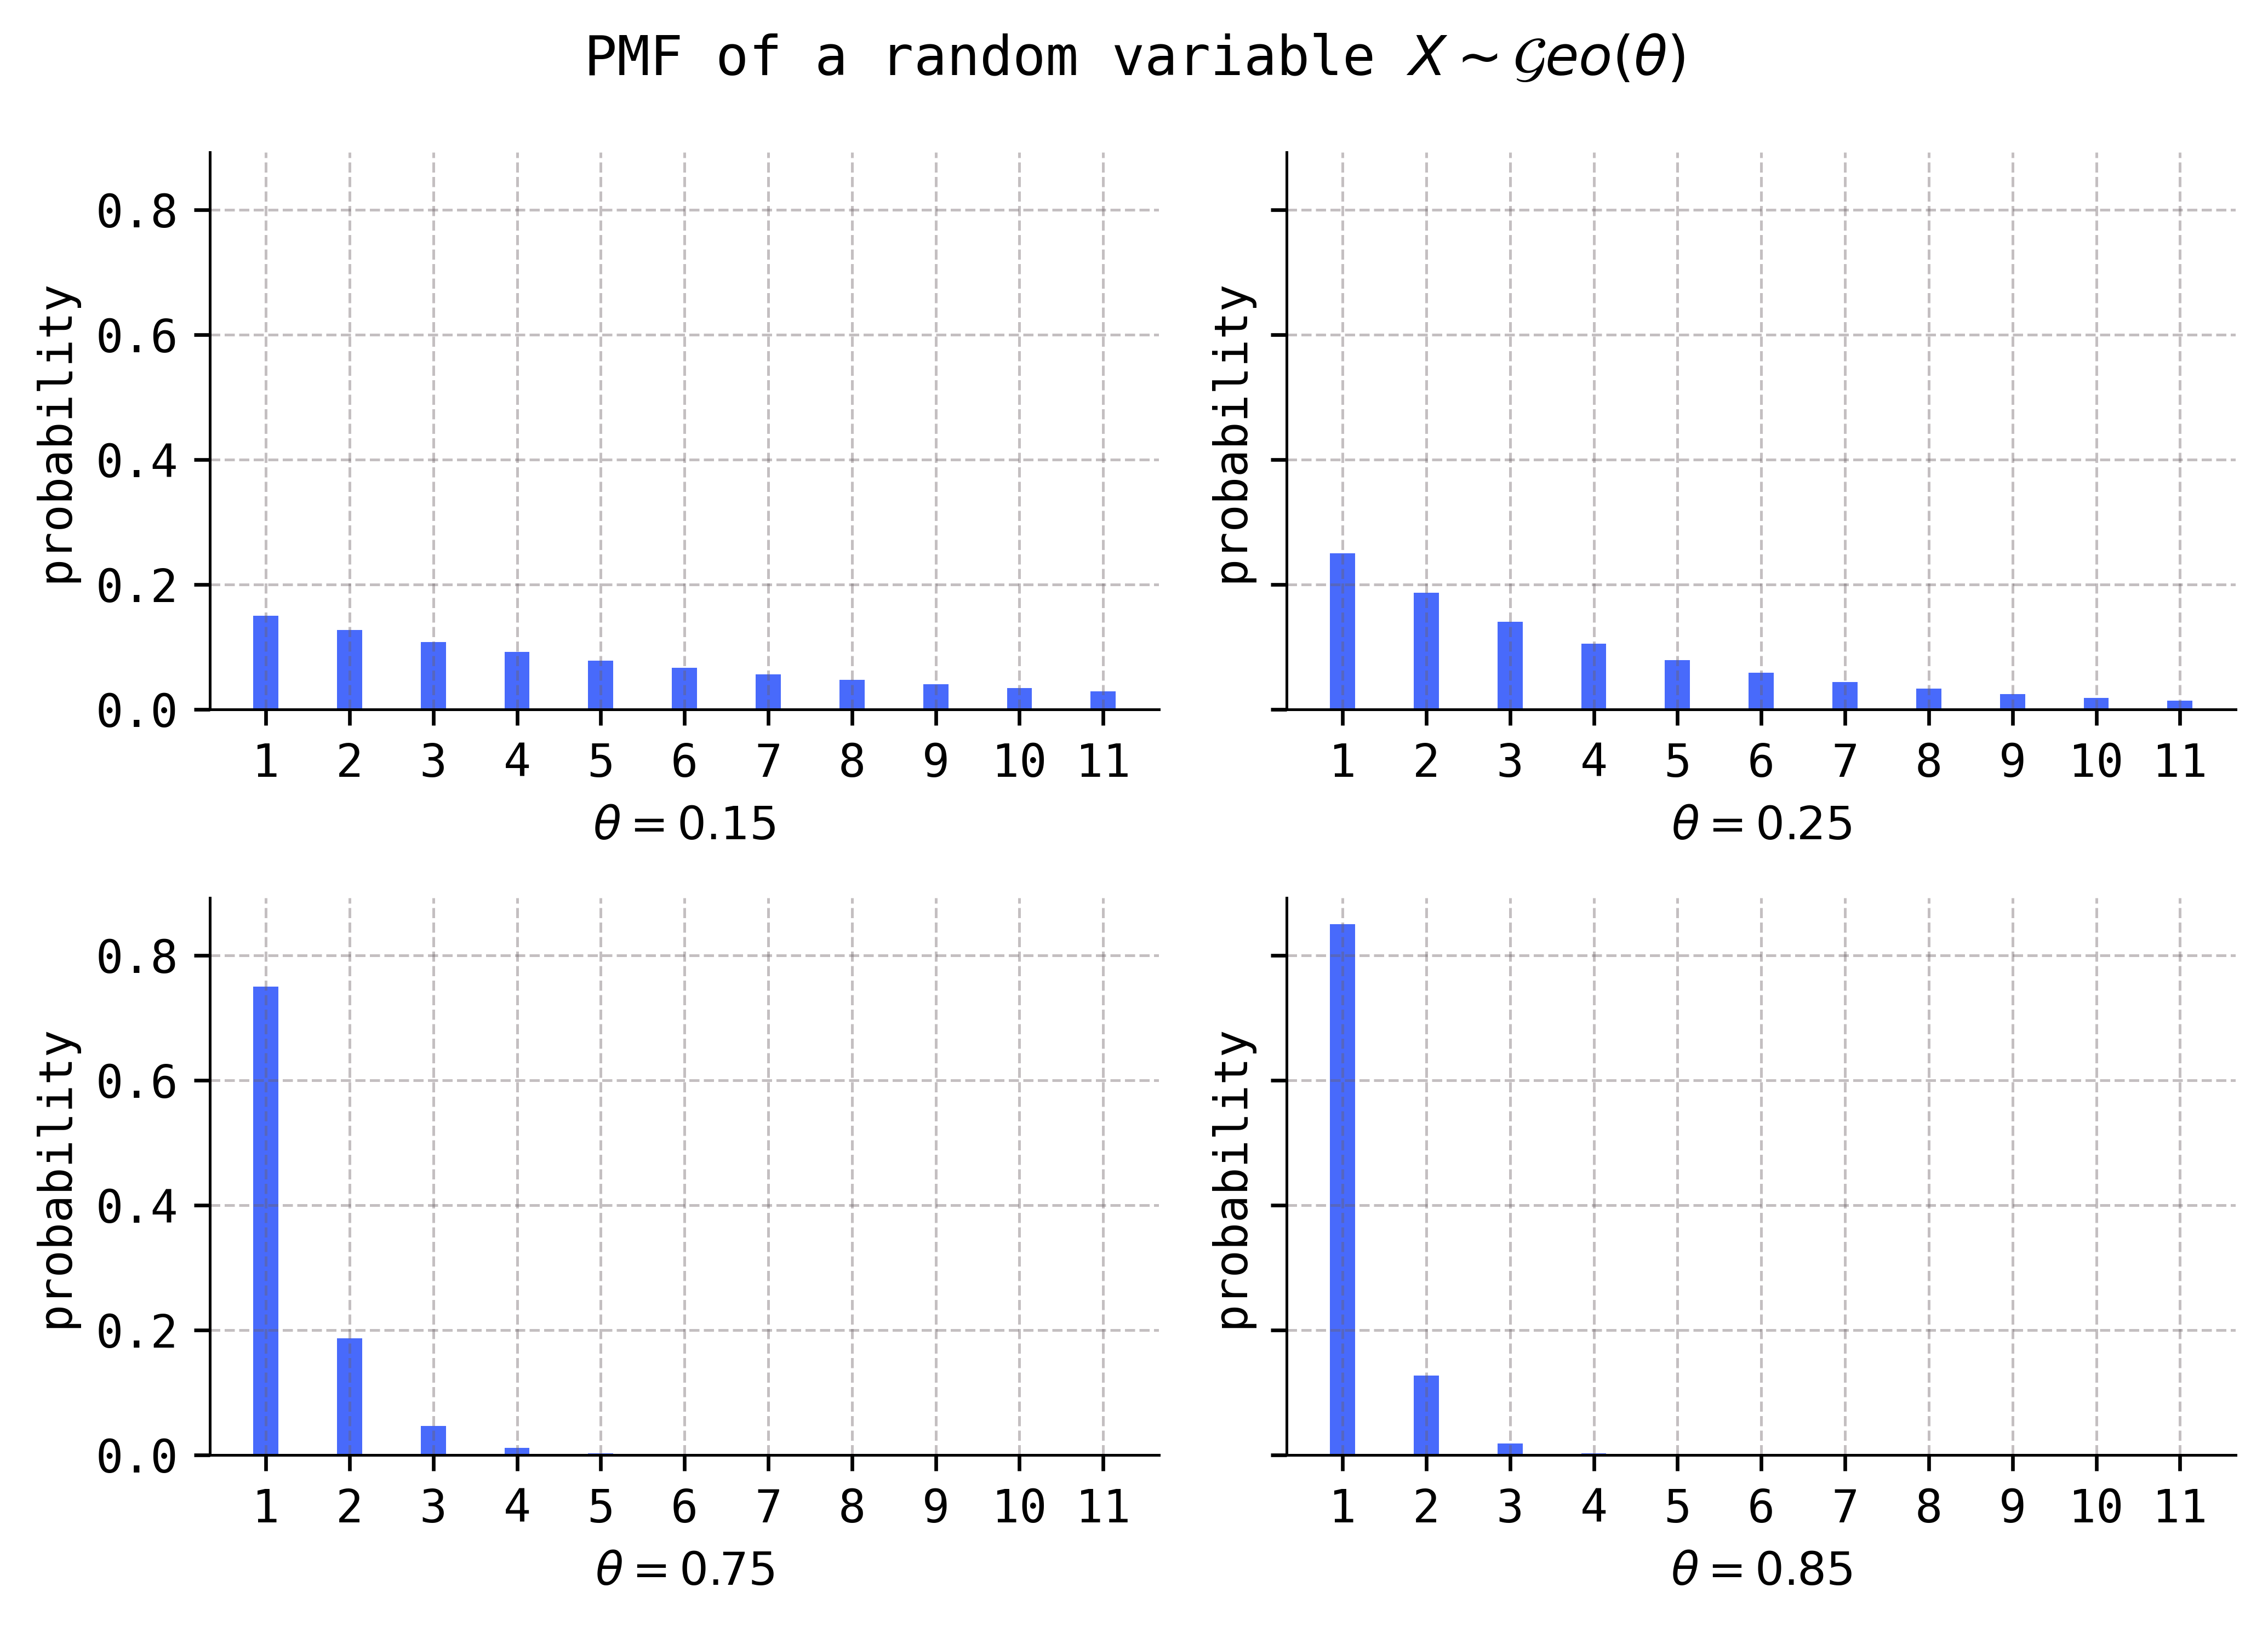

In [3]:
params = [[0.15, 0.25], [0.75, 0.85]]
support = np.arange(1, 12)

fig, axes = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(7, 5))

for i, j in product(range(2), repeat=2):
    theta = params[i][j]
    X = sp.stats.geom(p=theta)
    
    axes[i, j].bar(support, X.pmf(support), width=0.3)
    axes[i, j].set_ylabel('probability')
    axes[i, j].set_xticks(support)
    axes[i, j].set_xlabel(fr'$\theta={theta}$')

fig.suptitle(r'PMF of a random variable $X\sim \mathcal{G}eo(\theta)$')
plt.tight_layout()

It appears that increasing $\theta$ decreases both the mean and the variance of the distribution. This will be confirmed below when we uncover formulas for $E(X)$ and $V(X)$ when $X\sim \mathcal{G}eo(\theta)$. The parameter $\theta$ is the _shape parameter_ of the geometric distributions.

Just like the scenarios for Bernoulli and binomial random variables in the previous two sections, our archetypical scenario for a geometric random variable will also involve coin flips. But pay close attention, because the random variable *doesn't* count the number of heads any longer!

```{admonition} An archetypical geometric scenario

**Q**: Suppose that a coin is flipped until heads is obtained. Suppose further that each flip is independent of the others, and that we allow for the possibility that the coin is *loaded*, so that it lands heads with probability $\theta$ (which may not be $0.5$!). If $X$ is the number of flips it takes to obtain a head, what is the distribution of the random variable $X$?

**A**: $X\sim \mathcal{G}eo(\theta)$.
```

The sample space $S$ on which $X$ is defined consists of all sequences of the form

\begin{align*}
&(H), \\
&(T,H), \\
&(T, T, H), \\
&(T,T,T,H), \\
&\textit{etc}.
\end{align*}

The probability to obtain the first sequence is $\theta$; by independence, the probability to obtain the second is $\theta(1-\theta)$; the probability for the third is $\theta(1-\theta)^2$; and the probability for the fourth is $\theta(1-\theta)^3$. Do you see the pattern? If $x$ is the number of flips it takes to obtain a head, then we clearly have

$$
P(X=x) = \theta (1-\theta)^{x-1},
$$

so that $X\sim \mathcal{G}eo(\theta)$.

Like Bernoulli and binomial random variables, geometric random variables do not *only* apply in scenarios that involve coin flips. Indeed, the coin flips in our archetypical scenario can represent the binary outcomes of any scenario, as long as they are independent (when performed one after another) and have fixed probabilities.

```{prf:theorem} Expectations and variances of geometric variables
:label: exp-var-geometric-thm

If $X\sim \mathcal{G}eo(\theta)$, then

$$
E(X) = \frac{1}{\theta} \quad \text{and} \quad V(X) = \frac{1-\theta}{\theta^2}. 
$$
```

We will not prove these formulas here. See, for example, Theorem 3.8 in {cite}`Wackerly2014`.

Notice that our intuition outlined above regarding the effect of $p$ on the shape of the distributions is confirmed by these formulas: Increasing $p$ decreases both the mean and the variance of $Y$.

```{admonition} Problem Prompt

Do problems 3 and 4 on the worksheet.
```












## Hypergeometric distributions

The distributions in this section definitely have the most complicated expressions so far for their probability functions (they require *three* parameters!), but as we will see in our archetypical scenario, these distributions arise quite naturally.

```{prf:definition}
:label: hypergeometric-def

Let $M\geq 0$ be an integer, and let $n$ and $N$ be integers with $0\leq n,N\leq M$. A discrete random variable $X$ is said to have a *hypergeometric distribution* with parameters $M$, $n$, and $N$, denoted

\begin{equation}\notag
Y \sim \mathcal{HG}eo(M,n,N),
\end{equation}

if its probability mass function is given by

$$
p(x; M,n,N) = \frac{\binom{n}{x}\binom{M-n}{N-x}}{\binom{M}{N}}.
$$

with support all $x$ such that

$$
0 \leq x \leq n \quad \text{and} \quad 0 \leq N-x \leq M-n.
$$ (range-eqn)
```

These distributions have quite curious names---what exactly does *hypergeometric* mean? <a href="https://stats.stackexchange.com/a/90611">Here's</a> an enlightening explanation.

Here are some probability histograms for a hypergeometrically distributed random variable, for various settings of the parameters:

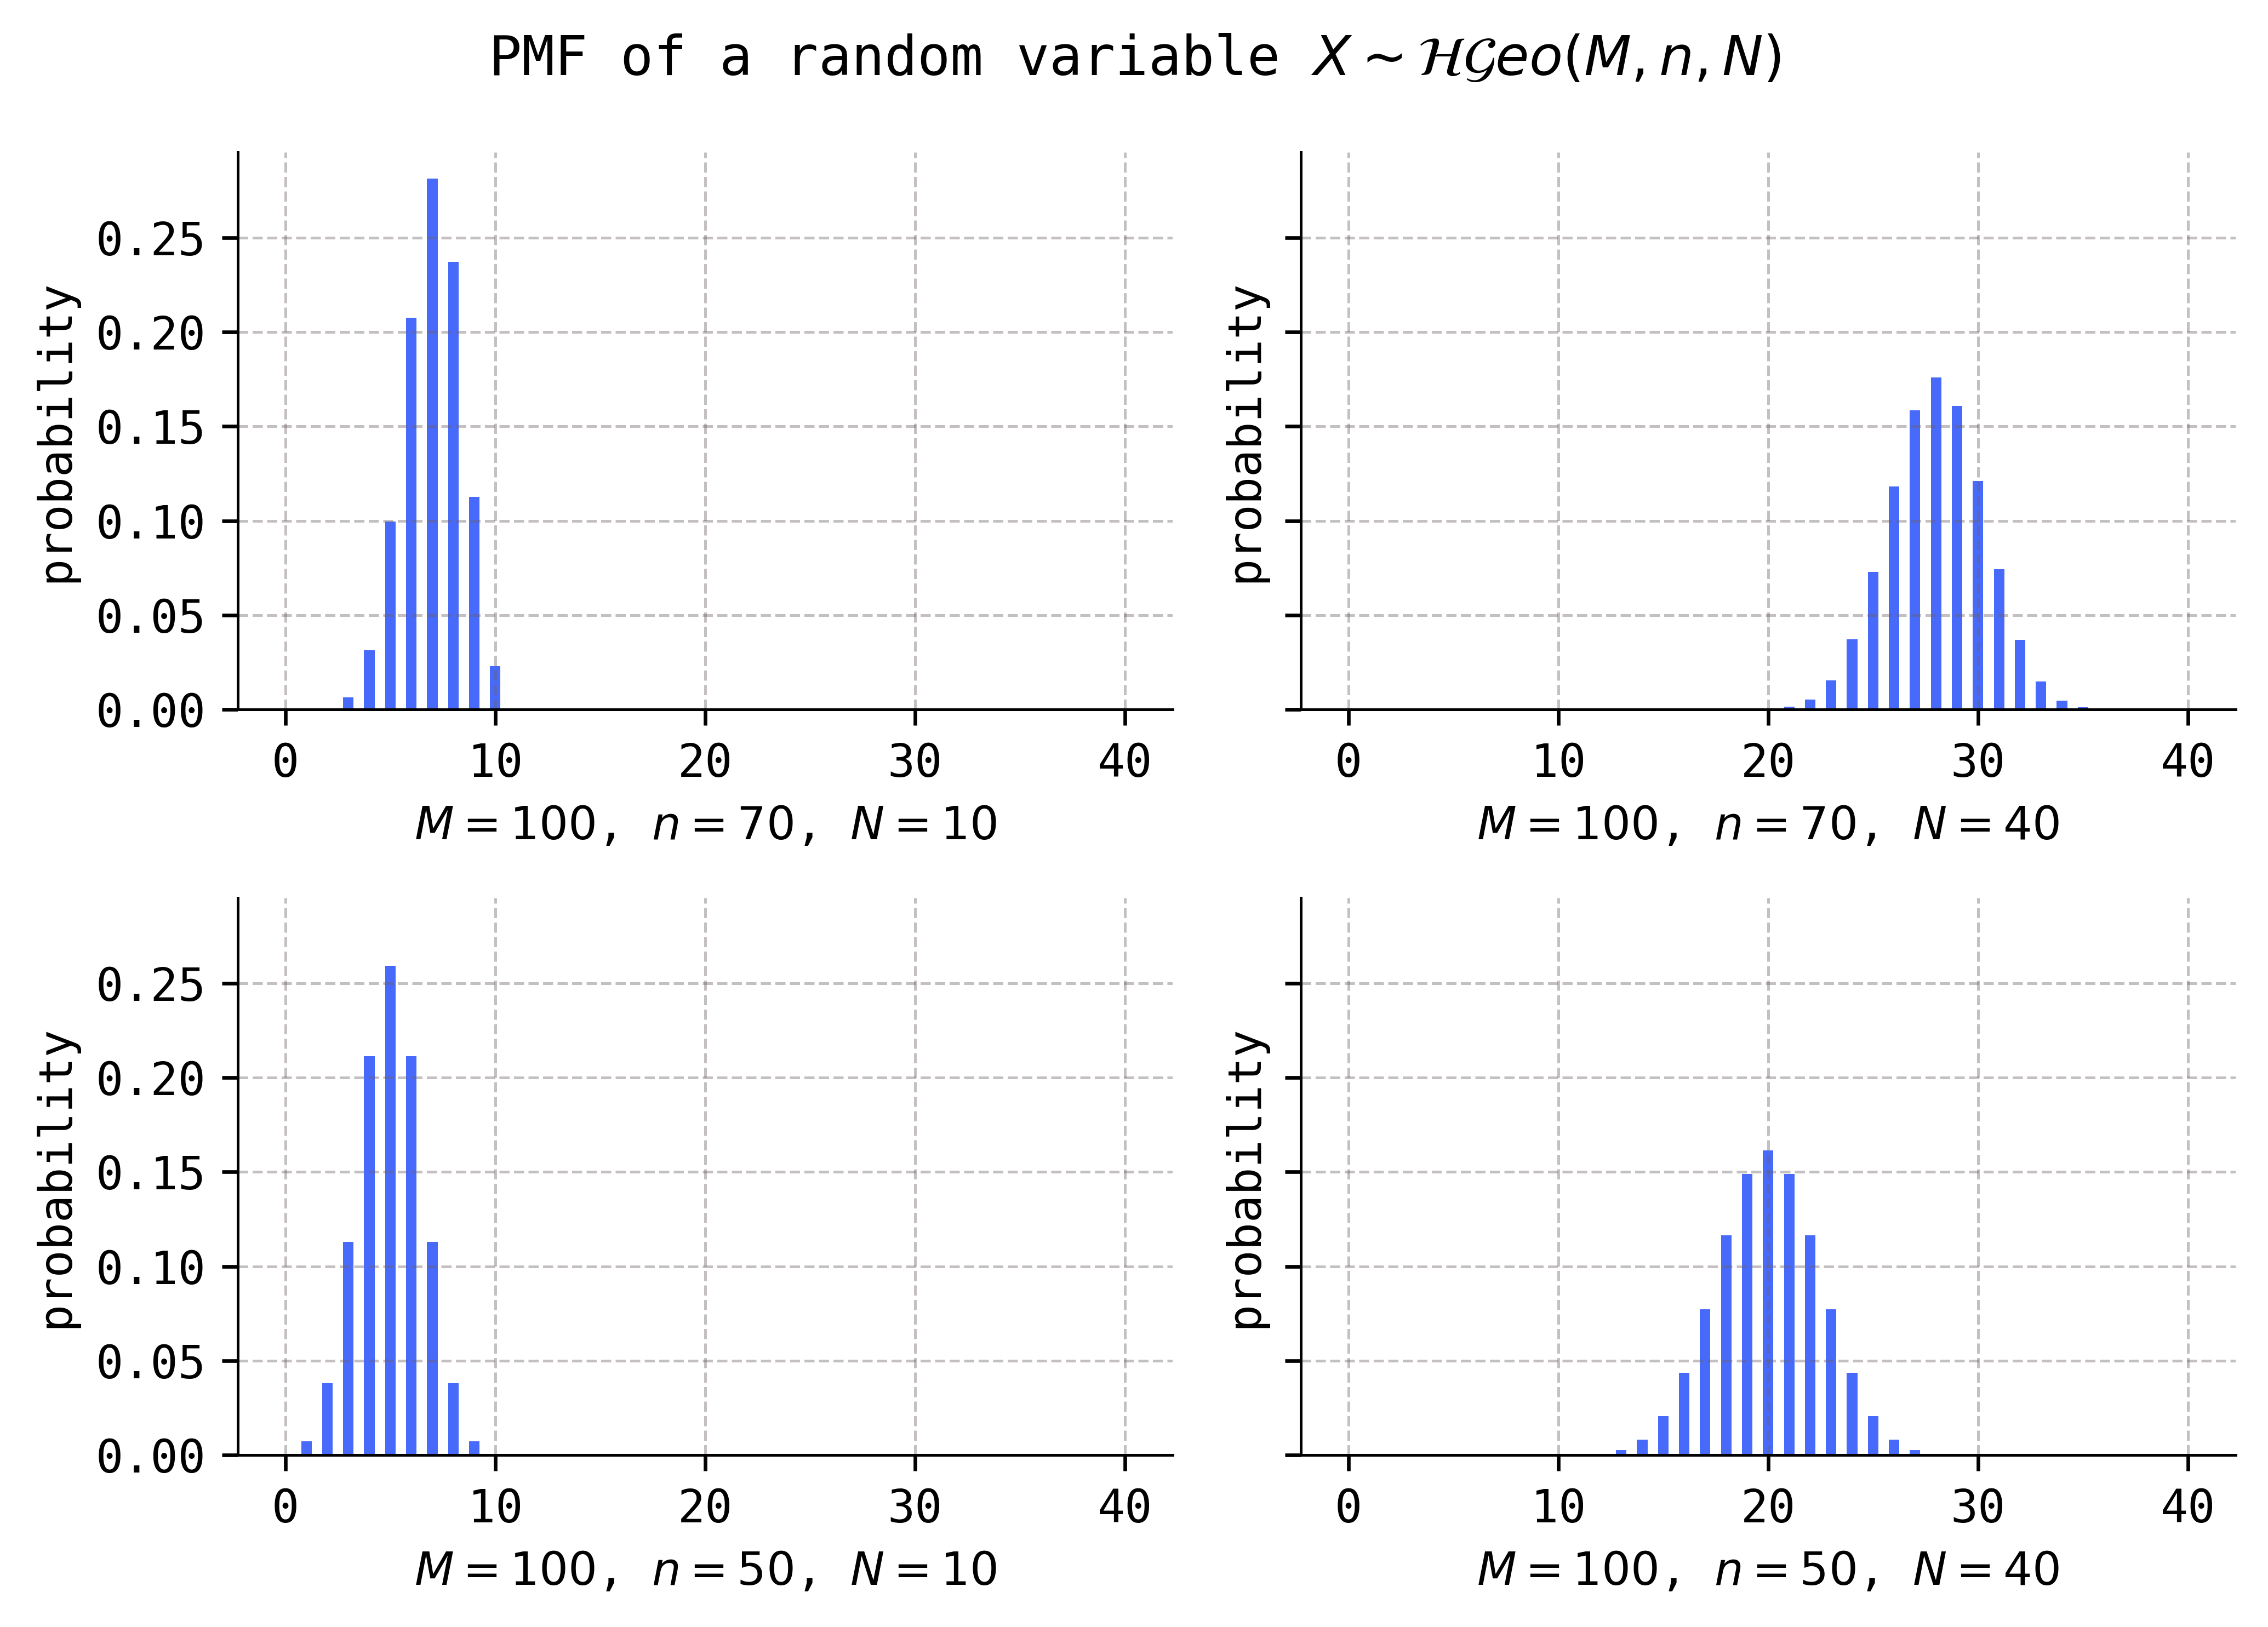

In [4]:
params = [[(100, 70, 10), (100, 70, 40)], [(100, 50, 10), (100, 50, 40)]]
support = np.arange(0, 41)

fig, axes = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(7, 5))

for i, j in product(range(2), repeat=2):
    M = params[i][j][0]
    n = params[i][j][1]
    N = params[i][j][2]
    X = sp.stats.hypergeom(M=M, n=n, N=N)
    
    axes[i, j].bar(support, X.pmf(support), width=0.5)
    axes[i, j].set_ylabel('probability')
    axes[i, j].set_xlabel(rf'$M={M}$, $n={n}$, $N={N}$')

fig.suptitle(r'PMF of a random variable $X\sim \mathcal{HG}eo(M,n,N)$')
plt.tight_layout()

Comparing the distributions in rows, it appears that larger values of the $N$ parameter increase the mean. Comparing the distributions in columns, it appears that increasing the value of the $n$ parameter does the same, i.e., increases the mean. All three of the parameters, $M$, $n$, and $N$, are called the _shape parameters_ of the hypergeometric distributions.

```{warning}

Be aware that the pattern $(M,n,N)$ and choice of letters for the parameters of hypergeometric distributions is **not** standardized accross all references. The parameters I have chosen here matches the [SciPy implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html) of hypergeometric random variables.

Here are some of the other parameter choices for the references mentioned in the bibliography:

* {cite:ts}`DeGrootSchervish2014` use parameters $(A,B,n)$. To translate to our parameters, take

    $$
    (M,n,N) = (A+B, A, n).
    $$

* {cite:ts}`Dekking2005` use parameters $(m,N,r)$. To translate to our parameters, take

    $$
    (M,n,N) = (N, m, r).
    $$

* {cite:ts}`Devore2021` use parameters $(n, M,N)$. To translate to our parameters, take

    $$
    (M,n,N) = (N, M, n).
    $$

* {cite:ts}`Wackerly2014` use parameters $(r, N, n)$. To translate to our parameters, take

    $$
    (M,n,N) = (N,r,n).
    $$

* [Wikipedia](https://en.wikipedia.org/wiki/Hypergeometric_distribution#) uses parameters $(N,K,n)$. To translate to our parameters, take

    $$
    (M,n,N) = (N, K, n).
    $$
```

Now, in what type of crazy scenario would something as complex and complicated as a hypergeometric distribution occur? Actually, such scenarios aren't crazy at all!

```{admonition} An archetypical hypergeometric scenario

**Q**: Suppose we have a collection of $M$ balls in an urn, with $n$ of them red, and the remaining $M-n$ black. Let $X$ denote the number of red balls in a given random selection of $N$ balls from the urn. What is the distribution of the random variable $X$?

**A**: $X\sim \mathcal{HG}eo(M,n,N)$.
```

Here's the justification. Since the selection is *random*, any selection is just as likely as any other, so

$$
P(\text{single selection of $N$ balls}) = \frac{1}{\binom{M}{N}},
$$

because there are exactly $\binom{M}{N}$ ways to choose $N$ balls from a total of $M$. It then follows that

$$
P(X=x) = \frac{k}{\binom{M}{N}},
$$ (almost-eqn)

where $k$ is the number of ways to choose $N$ balls from the urn, with $x$ of them red, and the remaining $N-x$ black. So, our goal is to compute $k$.

Well, if there are $n$ red balls, how many ways are there to choose $x$ of them? Exactly $\binom{n}{x}$ ways. And once these $x$ red balls are chosen, we would then need to choose $N-x$ black balls, of which there are exactly $\binom{M-n}{N-x}$ ways since there are $M-n$ black balls. So, by the Product Rule for Counting, we have

$$
k = \binom{n}{x} \binom{M-n}{N-x}.
$$

Therefore, from {eq}`almost-eqn` we get that

$$
P(X=x) = \frac{\binom{n}{x} \binom{M-n}{N-x}}{\binom{M}{N}},
$$

which is exactly what we wanted to show.

With this new knowledge, notice that the support {eq}`range-eqn` now makes complete sense, since

$$
0 \leq x \leq n
$$

says that you cannot have more red balls in your selection than the total number $n$ of red balls, while likewise

$$
0 \leq N-x \leq M-n
$$

says that you cannot have more black balls in your selection than the total number $M-n$ of black balls.

Now, hold on to your hats, because here come the formulas for the expectations and variances of hypergeometric random variables:

```{prf:theorem} Expectations and variances of hypergeometric variables
:label: exp-var-hypergeometric-thm

If $X\sim \mathcal{HG}eo(M,n,N)$, then

$$
E(X) = \frac{Nn}{M} \quad \text{and} \quad V(X) = \left(\frac{M-N}{M-1}\right) \cdot N \cdot \frac{n}{M} \left(1- \frac{n}{M} \right).
$$
```

We will not attempt to derive these formulas. If you want to see one possible derivation, wait until we talk about {prf:ref}`linear-exp-thm` and {prf:ref}`bilinear-thm`, and then have a look at Example 5.19 in {cite}`Devore2021`.

```{admonition} Problem Prompt

Do problems 5 and 6 on the worksheet.
```













## Poisson distributions

We've reached the last of our discrete distributions, before we move onto continuous ones.

```{prf:definition}
:label: poisson-def

Let $\mu>0$ be a real number. A discrete random variable $X$ is said to have a *Poisson distribution* with parameter $\mu$, denoted

$$
X \sim \mathcal{P}ois(\mu),
$$

if its probability mass function is given by

$$
p(x;\mu) = \frac{\mu^x}{x!}e^{-\mu}
$$

with support $\{0,1,2,\ldots\}$.
```

In some references, the parameter $\mu$ is called $\lambda$ instead. But this clashes with the usage of $\lambda$ as a "rate" or "intensity" parameter for _Poisson processes_, which we will talk about [below](exp-scenario). In any case, no matter what you call it, the effect of the parameter on the shape of the distributions is clear:

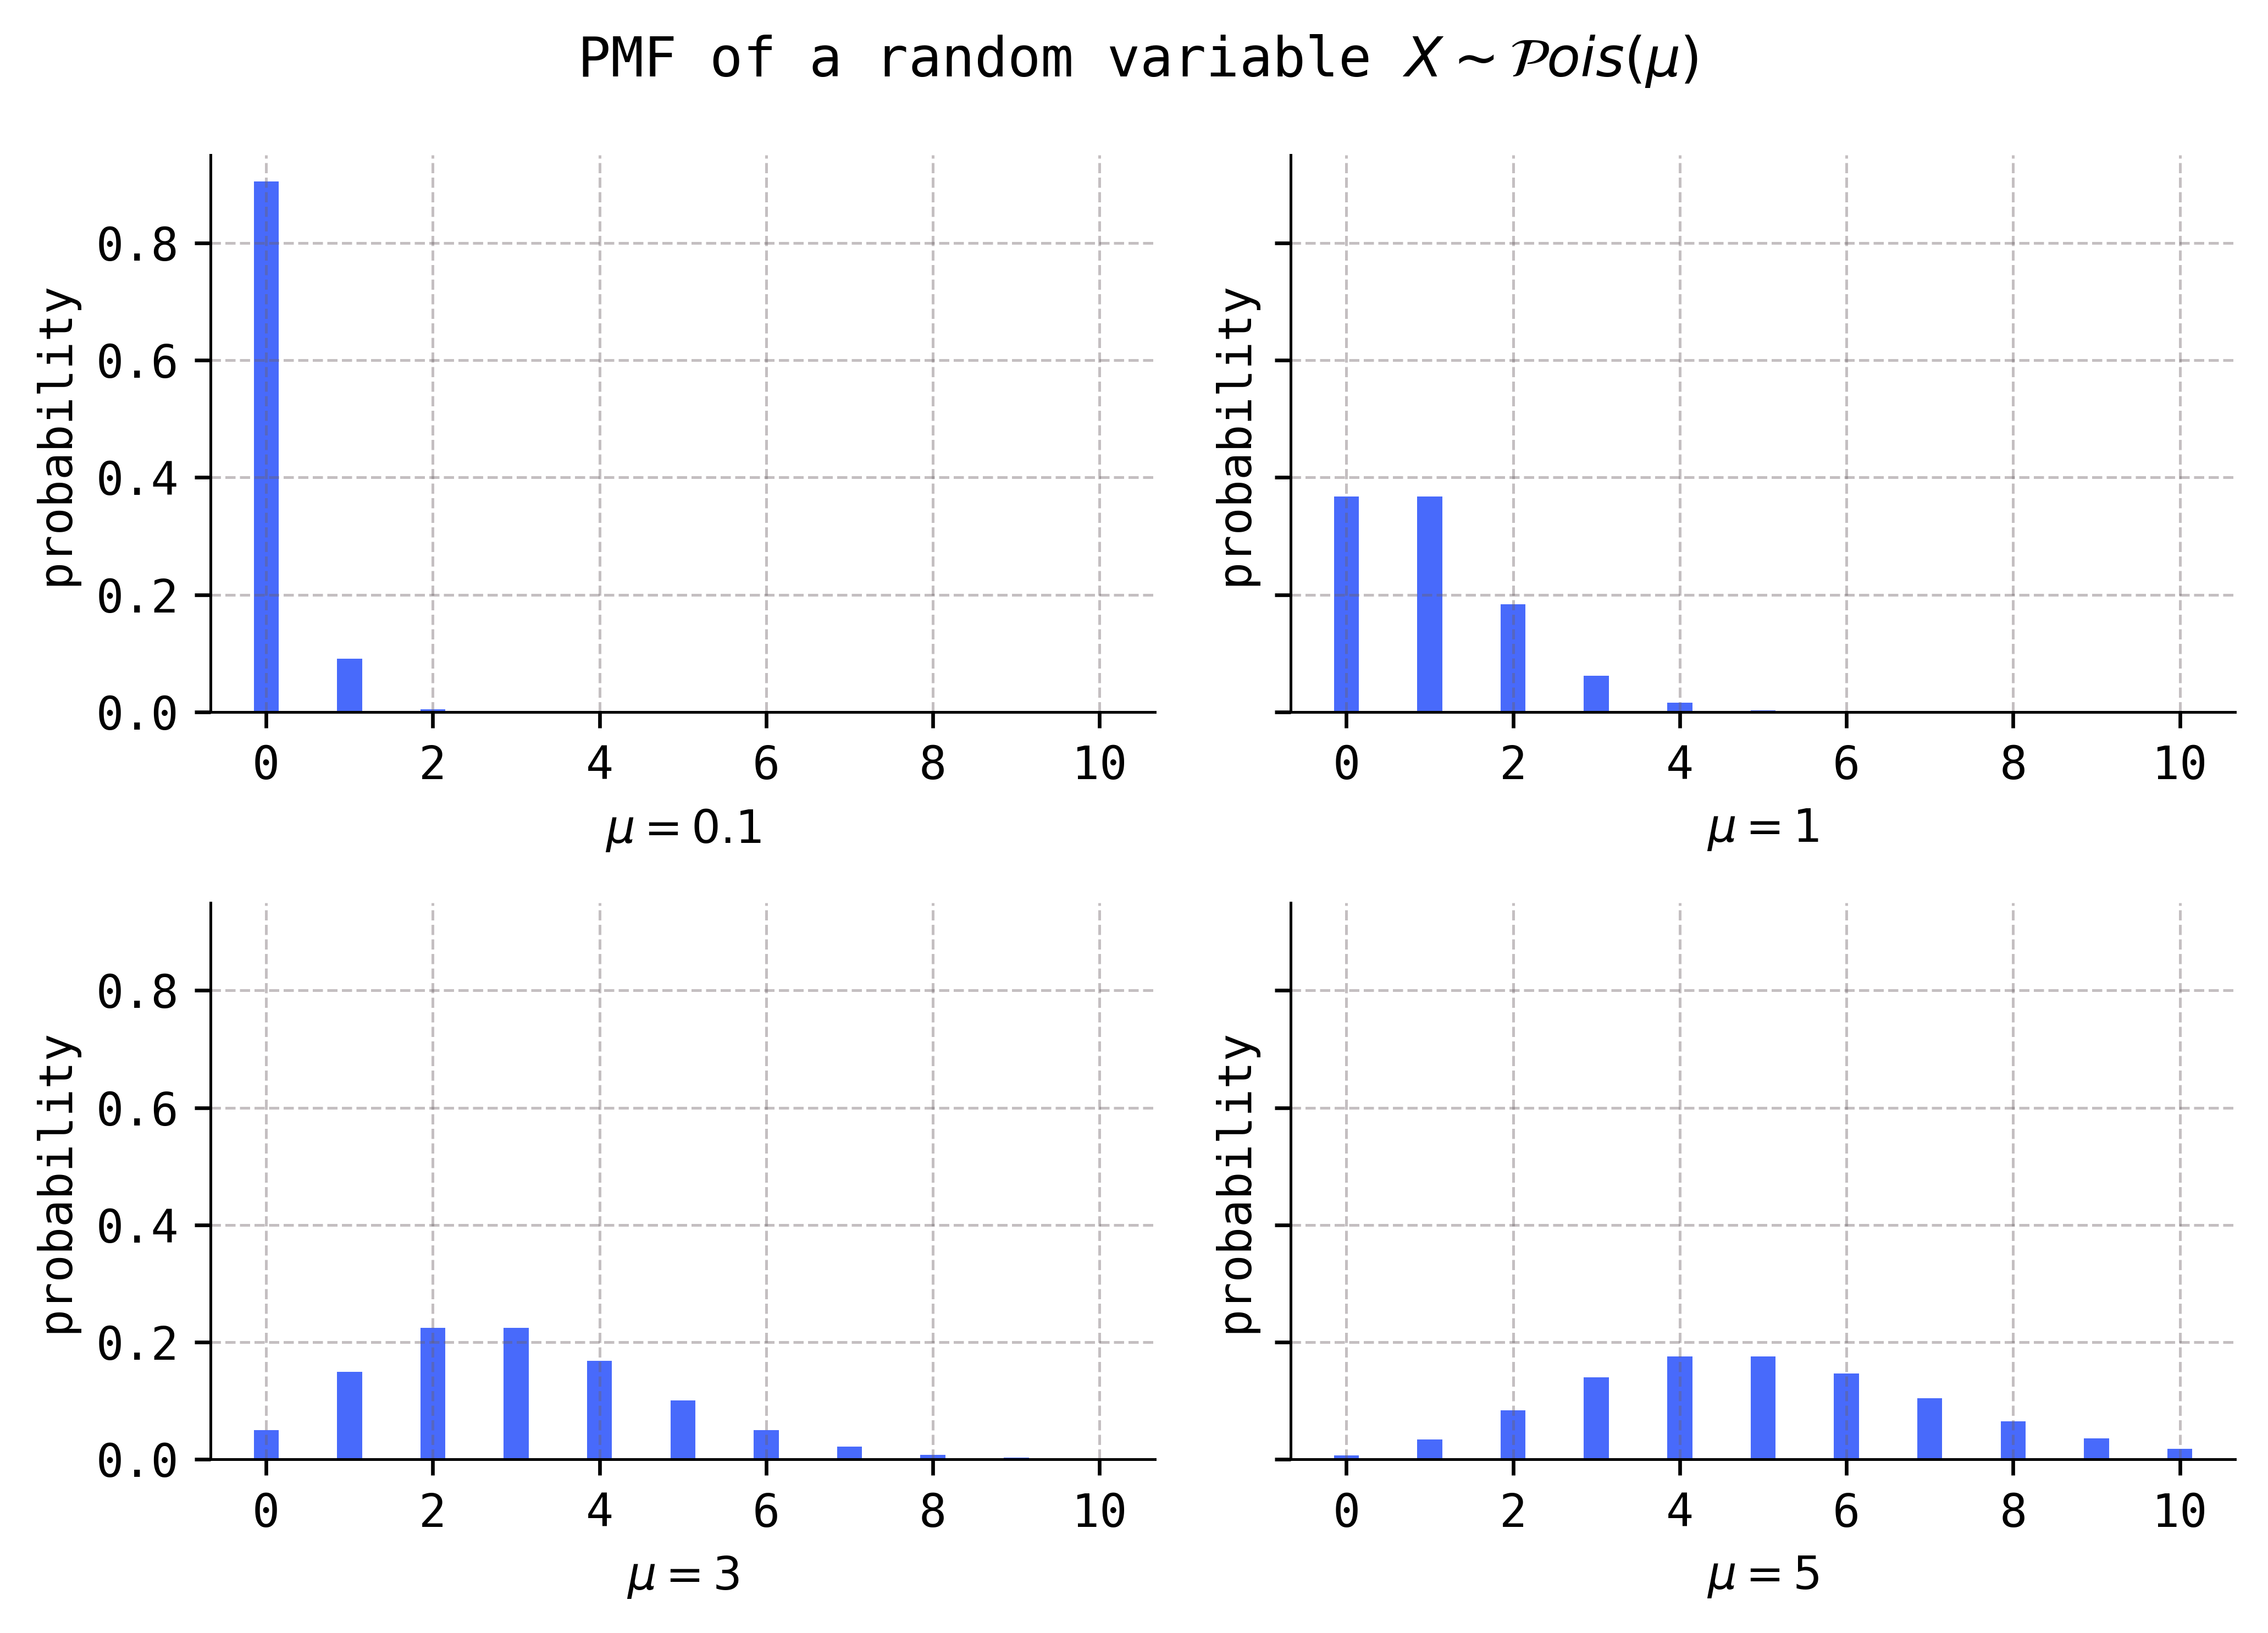

In [5]:
params = [[0.1, 1], [3, 5]]
support = np.arange(0, 11)

fig, axes = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(7, 5))

for i, j in product(range(2), repeat=2):
    mu = params[i][j]
    X = sp.stats.poisson(mu=mu)
    
    axes[i, j].bar(support, X.pmf(support), width=0.3)
    axes[i, j].set_ylabel('probability')
    axes[i, j].set_xlabel(rf'$\mu = {mu}$')

fig.suptitle(r'PMF of a random variable $X\sim \mathcal{P}ois(\mu)$')
plt.tight_layout()

Increasing the parameter $\mu$ appears to both increase the mean and variance of the distribution. We will see that this really is the case below when we compute $E(X)$ and $V(X)$. The parameter $\mu$ is a _shape parameter_.

The archetypical scenarios for Bernoulli, binomial, and geometric random variables involved coin flips, which model different types of repeated scenario with binary and independent outcomes. The archetypical scenario for hypergeometric variables involved selecting balls from an urn. The justifications that each of these scenarios could be modeled by the claimed distributions relied essentially on basic combinatorics. But, as you are about to see, the justification that our archetypical Poisson scenario really *can* be modeled by a Poisson random variable is of a very different flavor.

```{margin}
My description of this particular scenario, as well as the continuations below ([here](exp-scenario) and [here](gamma-scenario)) follows the extremely well-written Chapter 12 in {cite}`Dekking2005`.
```

```{admonition} An archetypical Poisson scenario
:name: poisson-scenario

**Q**: Over a span of $t$ hours, let $X$ denote the number of emails that arrive in your inbox. Assuming that the emails arrive at random and independently of each other, and that the mean rate at which they arrive is $\lambda$ (measured in units of reciprocal hours, or hour$^{-1}$), what is the distribution of the random variable $X$?

**A**: $X\sim \mathcal{P}ois(\lambda t)$.
```

Before proving that $X$ has the claimed distribution, it is worth commenting on the units of the rate parameter $\lambda$. Indeed, you might have expected its units to be

$$
\frac{\text{email}}{\text{hour}} \quad \text{rather than} \quad \frac{1}{\text{hour}}.
$$

In fact, in a textbook problem, the rate _would_ often be given with the former units, rather than the latter. But as you will see below, this is inconsistent with the fact that $X$ models [_counting data_](https://en.wikipedia.org/wiki/Count_data) which are [dimensionless quantities](https://en.wikipedia.org/wiki/Dimensionless_quantity#Integers).

Now, to show that $X$ has a Poisson distribution, we begin by first deriving an *approximation* for the distribution of $X$. To do this, we imagine that the time interval begins at time $=0$ and we visualize the arrivals of emails as marks along the interval $[0,t]$:

```{image} ../img/pois1.svg
:width: 70%
:align: center
```
&nbsp;

The trick now is to chop the time interval $[0,t]$ into small enough subintervals that no more than one email arrives in any given subinterval:

```{image} ../img/pois2.svg
:width: 70%
:align: center
```
&nbsp;

Suppose that there are $n$ subintervals, each of equal length $\Delta t = t/n$:

```{image} ../img/pois3.svg
:width: 70%
:align: center
```
&nbsp;

Now, we let $Y_k$ be the number of emails that arrive in the $k$-th subinterval, for each $k=1,2,\ldots,n$. By construction, we have that $Y_k=0$ or $1$, and thus each $Y_k$ is a Bernoulli random variable, parametrized by some parameter $\theta_k$. But what is $\theta_k$?

To answer this, recall that we are told the mean rate at which the emails arrive is $\lambda$ (measured in reciprocal hours). Therefore, since the length of each of the subintervals is $\Delta t$, we would expect, on average, that exactly

```{margin}

Notice that in order for the product $\lambda \cdot \Delta t$ to represent a probability, which is a dimensionless quantity, the rate parameter $\lambda$ must be measured in reciprocal hours!
```

$$
\lambda \cdot \Delta t = \frac{\lambda t}{n}
$$

emails arrive in the $k$-th subinterval. But we know that $E(Y_k) = \theta_k$ because $Y_k$ is Bernoulli, and this implies that $\theta_k = \lambda t/n$. Thus $Y_k \sim \mathcal{B}er(\lambda t/n)$, for each $k=1,2,\ldots,n$.

We now bring this all back to $X$. As long as $n$ is large enough (so that $\Delta t$ is small), we should have

$$
X \approx Y_1 + Y_2 + \cdots + Y_n.
$$ (approx-eqn)

It is natural to assume that the Bernoulli random variables on the right-hand side are independent, which means---as we saw {prf:ref}`above <bern-bin-thm>`---that $X$ is distributed *approximately* as $\mathcal{B}in(n,\lambda t/n)$. Moreover, it is natural to believe that the approximation {eq}`approx-eqn` gets better and better the larger $n$ is, and that it becomes an *equality* in the limit as $n\to \infty$.

But a $\mathcal{B}in(n,\lambda t/n)$ random variable has probability mass function

\begin{align*}
p(x) &= \binom{n}{x} \left( \frac{\lambda t}{n} \right)^x \left(1 - \frac{\lambda t}{n} \right)^{n-x} \\
&= \left[ \binom{n}{x} \cdot \frac{1}{n^x}\right] \cdot (\lambda t)^x \cdot \left(1 - \frac{\lambda t}{n} \right)^{n} \left(1 - \frac{\lambda t}{n} \right)^{-x}.
\end{align*}

Note that

$$
\lim_{n\to \infty} \binom{n}{x} \cdot \frac{1}{n^x} = \lim_{n\to \infty} \frac{n}{n}\cdot \frac{n-1}{n} \cdots  \frac{n-x+1}{n} \cdot \frac{1}{x!} = \frac{1}{x!}
$$

and

$$
\lim_{n\to \infty} \left(1 - \frac{\lambda t}{n} \right)^{n} = e^{-\lambda t},
$$

as well as

$$
\lim_{n\to \infty} \left(1 - \frac{\lambda t}{n} \right)^{-x} = 1.
$$

Thus, taking the limit $n\to \infty$ in the expression for $p(x)$ above gives

$$
\lim_{n\to \infty} p(x) = \frac{(\lambda t)^x}{x!} e^{-\lambda t},
$$

and so from {eq}`approx-eqn` we conclude that $X\sim \mathcal{P}ois(\lambda t)$.

We will carry this email scenario over to our discussions below of archetypical scenarios for [exponential](exp-scenario) and [gamma random variables](gamma-scenario), so make sure you understand the argument just given. Here's a preview of what we will learn:

```{admonition} A trio of related random variables

1. _Poisson variables_ model the _counts_ of random and independent events occurring over time.
2. _Exponential variables_ model the _interarrival times_ between random and independent events (i.e., the times between events).
3. _Gamma variables_ model the times of occurences of random and independent events.
```

In fact, these variables not only model random and independent events occurring over _time_, but also over _space_ and other continuous dimensions. We will see examples of this in the Problem Prompt [below](pois-pp). But first, let's show that the name of the parameter $\mu$ is well-chosen; that it is, in fact, the mean of the distribution.

```{prf:theorem} Expectations and variances of Poisson variables
:label: exp-var-poisson-thm

If $X\sim \mathcal{P}ois(\mu)$, then

$$
E(X) = \mu \quad \text{and} \quad V(X) = \mu.
$$
```

First, let's establish the formula for the expectation:

$$
E(X) = \sum_{x=1}^\infty x \frac{\mu^x}{x!}e^{-\mu} = \mu\sum_{x=1}^\infty \frac{\mu^{x-1}}{(x-1)!}e^{-\mu} = \mu \sum_{x=0}^\infty \frac{\mu^x}{x!}e^{-\mu} = \mu,
$$

since $\sum_{x=0}^\infty \mu^xe^{-\mu}/x!=1$. (Why?) Deriving the formula for the variance begins with a trick using the {prf:ref}`LotUS <lotus-thm>`:

\begin{align*}
E\left( X(X-1) \right) &= \sum_{x=2}^\infty x(x-1) \frac{\mu^x}{x!}e^{-\mu} \\
&= \mu^2 \sum_{x=2}^\infty \frac{\mu^{x-2}}{(x-2)!} e^{-\mu} \\
&= \mu^2 \sum_{x=0}^\infty \frac{\mu^x}{x!} e^{-\mu} \\
&= \mu^2.
\end{align*}

Then, using {prf:ref}`"weak" linearity <weak-linear-thm>` of expectations, we get:

$$
E(X^2) = E(X^2 - X) + \mu = E\left(X(X-1) \right) + \mu = \mu^2 + \mu.
$$

Combining this with the {prf:ref}`"shortcut formula" <shortcut-var-thm>` for variance gives

$$
V(X) = E(X^2) - \mu^2 = \mu,
$$

as desired.


```{admonition} Problem Prompt
:name: pois-pp

Do problems 7-9 on the worksheet.
```


















(norm-univariate-sec)=
## Normal distributions

The distributions studied in this section are often said to be the most important in probability and statistics. This is primarily due to their ubiquity, occurring in all sorts of varied applications and scenarios. Indeed, these distributions will be with us constantly throughout the rest of the course. These are also the first distributions that we study in this chapter that are continuous, rather than discrete.

```{prf:definition}
:label: gaussian-def

Let $\mu$ and $\sigma$ be real numbers with $\sigma>0$. A continuous random variable $X$ is said to have a *normal distribution* (or _Gaussian distribution_) with parameters $\mu$ and $\sigma$, denoted

$$
X \sim \mathcal{N}(\mu,\sigma^2),
$$

if its probability density function is given by

$$
f(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[ - \frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2 \right]
$$

with support $\mathbb{R}$.

If $\mu=0$ and $\sigma=1$, then $X$ is called a _standard normal variable_ (or _standard Gaussian variable_) and is often represented as $Z$.
```

As the choice of letters suggest, the parameters $\mu$ and $\sigma$ turn out to be the mean and standard deviation of $X$. The graphs of normal density curves are the familiar "bell curves," and altering $\mu$ and $\sigma$ have exactly the effect that you would expect:

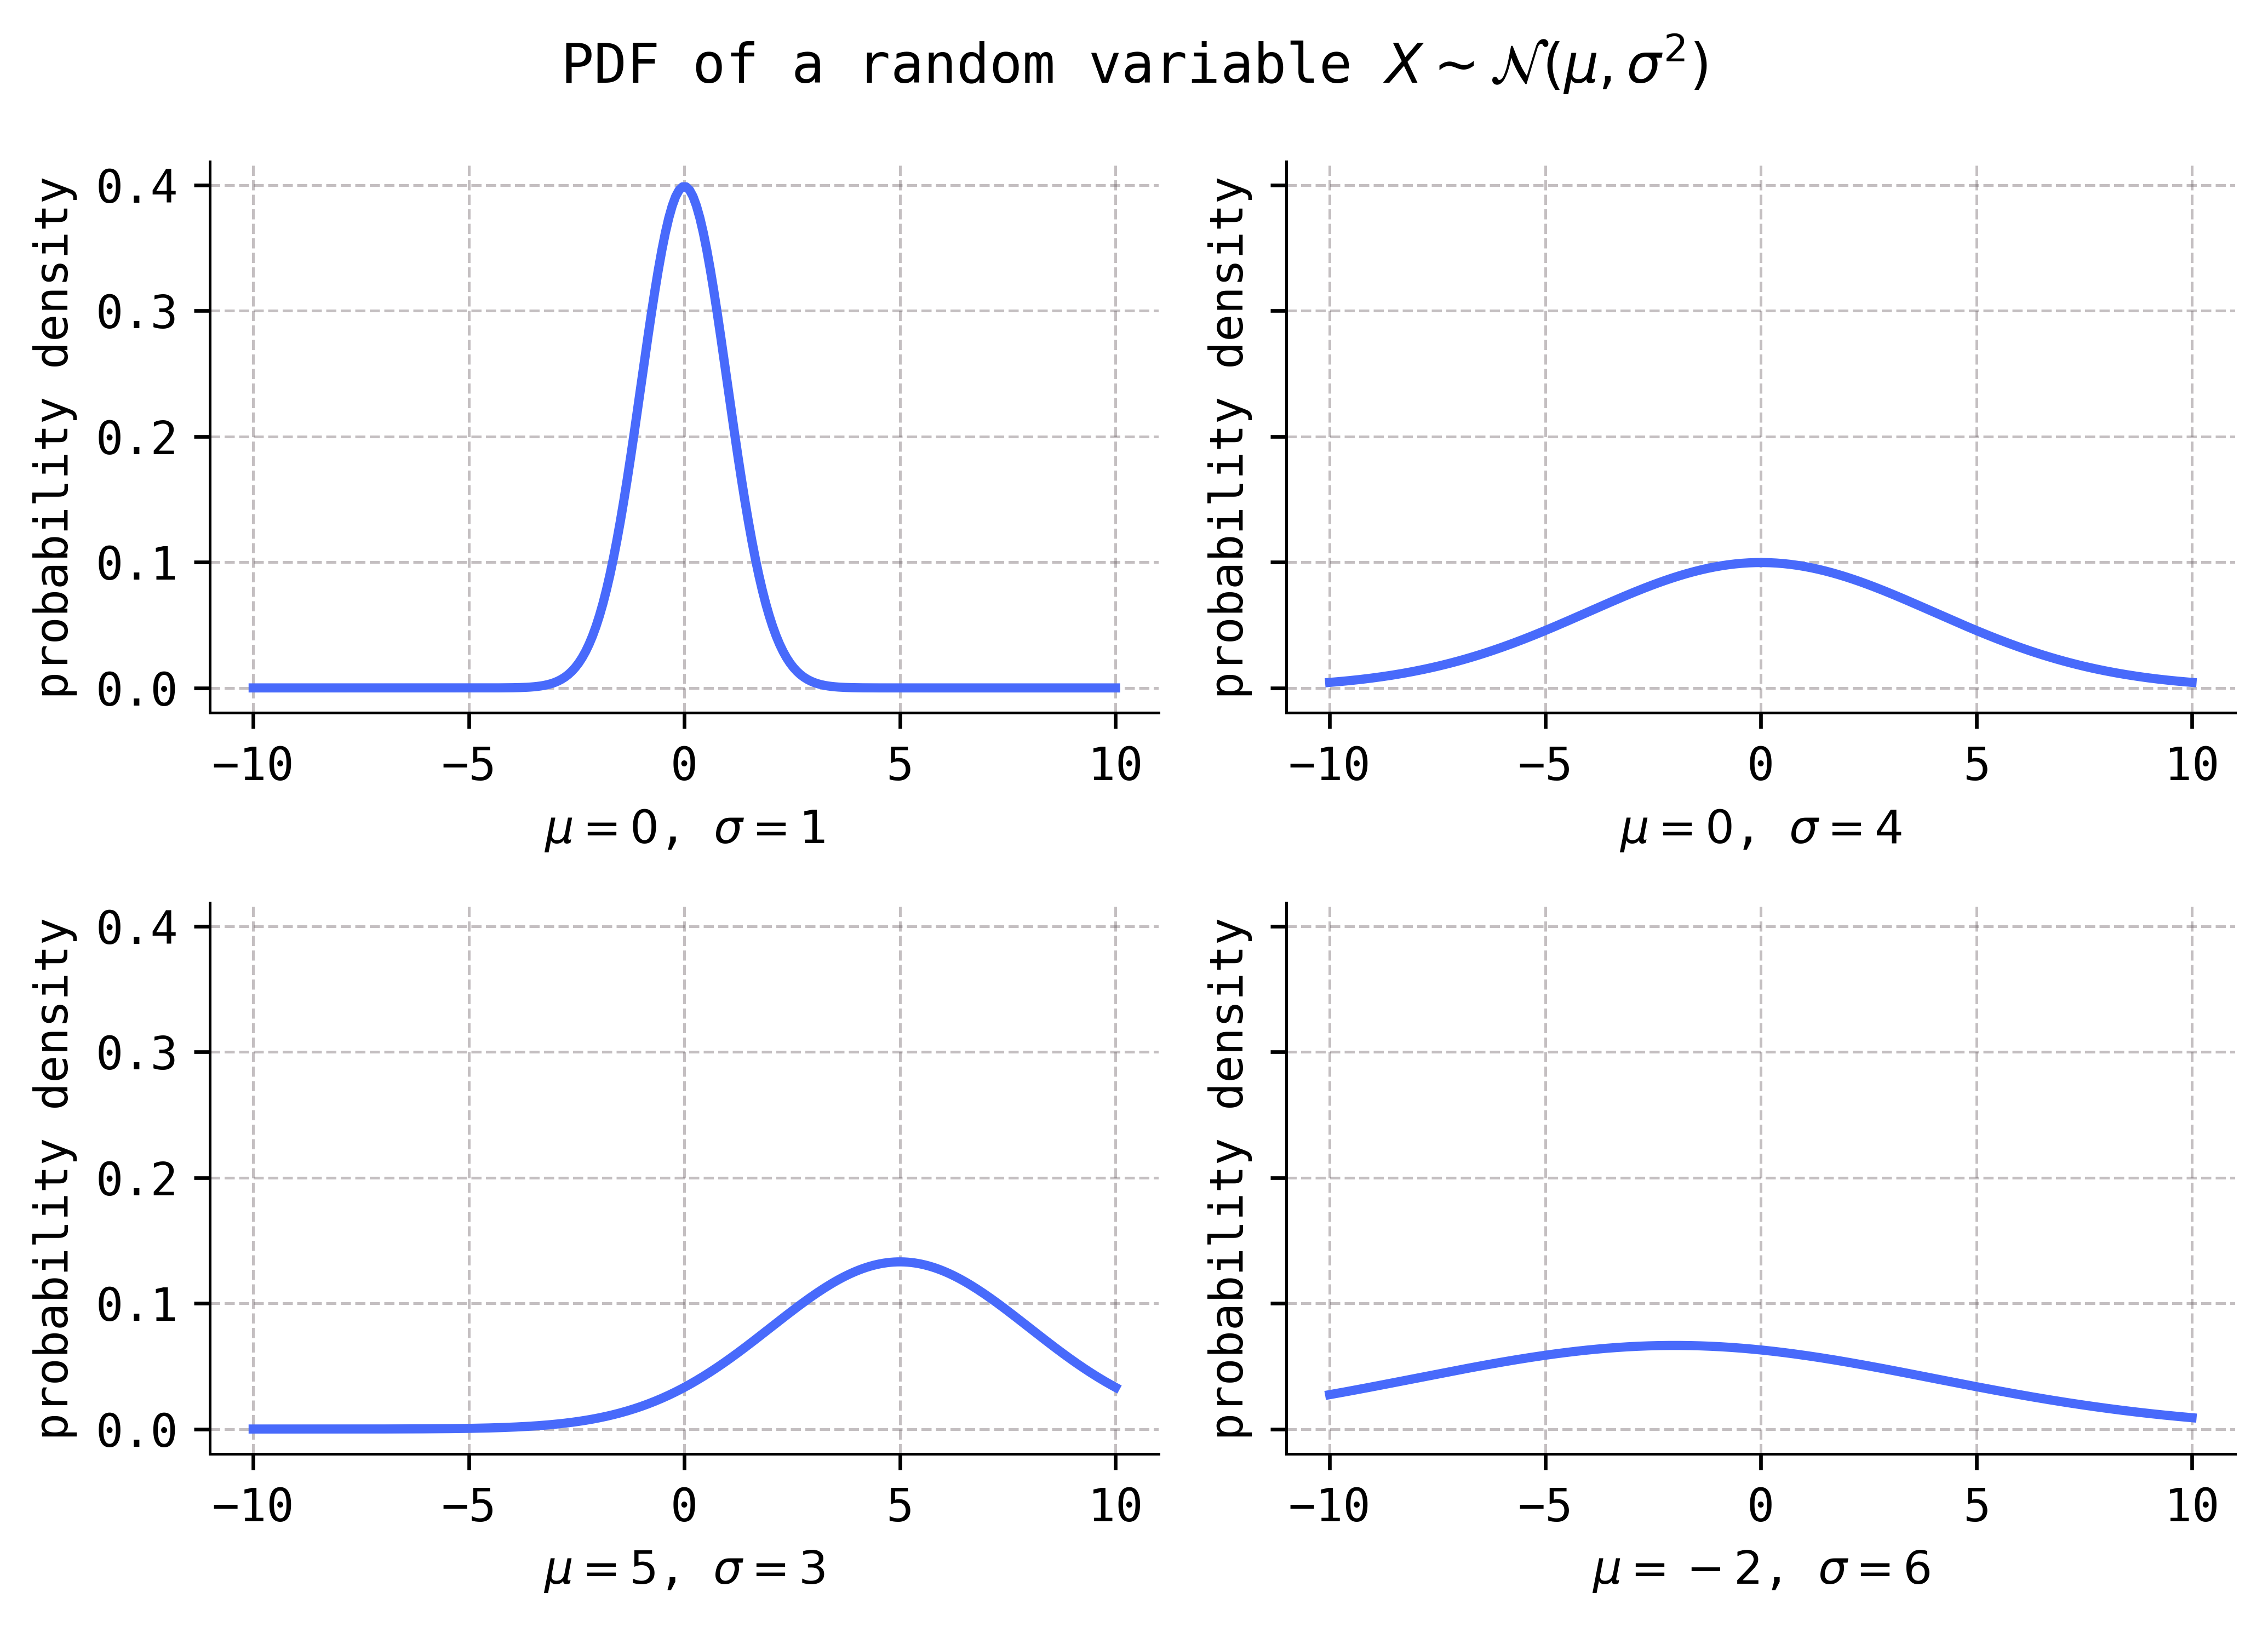

In [6]:
params = [[(0, 1), (0, 4)], [(5, 3), (-2, 6)]]
support = np.linspace(-10, 10, 250)

fig, axes = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(7, 5))

for i, j in product(range(2), repeat=2):
    mu = params[i][j][0]
    sigma = params[i][j][1]
    X = sp.stats.norm(loc=mu, scale=sigma)
    
    axes[i, j].plot(support, X.pdf(support))
    axes[i, j].set_ylabel('probability density')
    axes[i, j].set_xlabel(rf'$\mu={mu}$, $\sigma={sigma}$')

fig.suptitle(r'PDF of a random variable $X\sim \mathcal{N}(\mu,\sigma^2)$')
plt.tight_layout()

Notice that the parameters of the distribution in the upper-left are $(\mu,\sigma) = (0, 1)$, so the displayed density is the _standard_ normal one. It is a {prf:ref}`corollary <standardization-cor>` of the next general result that _every_ normally distributed variable may be transformed into a _standard_ normal variable via an affine transformation.

```{prf:theorem} Affine transformations of normal variables
:label: affine-gaussian-thm

Let $X\sim \mathcal{N}(\mu,\sigma^2)$ and $a$ and $b$ be two constants with $a\neq 0$. Then $Y = aX+b$ is a normal random variable with $\mu_Y = a\mu + b$ and $\sigma_Y = |a|\sigma$.
```

The proof is a special case of a general result for affine transformations that we will study [later](fun-rvs), but the computations are simple enough that we can describe them now. The idea is to compute the probability $P(u \leq Y \leq v)$ for real numbers $u<v$, and to show that $Y$ has the desired PDF. We will to this in the special case that $a>0$. So, we compute

\begin{align*}
P(u \leq Y \leq v) &= P\left((u-b)/a \leq X \leq (v-b)/a\right) \\
&= \int_{(v-b)/a}^{(u-b)/a} \frac{1}{\sigma \sqrt{2\pi}} \exp \left[ - \frac{1}{2} \left( \frac{x-\mu}{\sigma}\right)^2 \right] \ \text{d}x \\
&= \int_u^v \frac{1}{a\sigma \sqrt{2\pi}} \exp \left[ -\frac{1}{2} \left( \frac{y-(a\mu+b)}{a\sigma}\right)^2\right]  \ \text{d}y,
\end{align*}

where we made the substitution $y=ax+b$ in passing from the first integral to the second. But the integrand in the second integral is exactly the PDF of a $\mathcal{N}(a\mu+b, a^2\sigma^2)$ distribution, which is what we wanted to show.

Now, let me show you how this result may be used to transform normal variables into standard normal ones:

```{prf:corollary} Standardization of normal variables
:label: standardization-cor

If $X\sim \mathcal{N}(\mu,\sigma^2)$, then $Z = (X-\mu)/\sigma$ has a standard normal distribution.
```

As the subtitle of the corollary shows, the process of transforming a normal variable to a standard normal one is called _standardization_. We will use this process constantly later in the course. To prove the corollary, simply note that $Z$ is an affine transformation $aX+b$ with $a=1/\sigma$ and $b=-\mu/\sigma$. Then, the theorem gives $Z\sim \mathcal{N}(a\mu+b,a^2\sigma^2) = \mathcal{N}(0,1)$.

The CDF of a standard normal variable is so important that it gets its own notation described in the next definition:

```{prf:definition}
:label: std-normal-stuff-def

Let $Z\sim \mathcal{N}(0,1)$ be a standard normal random variable.

* The probability density function of $Z$ is denoted $\phi(z)$.

* The cumulative distribution function of $Z$ is denoted $\Phi(z)$. 

* For each real number $\alpha$, we define $z_\alpha$ to be the number for which the area under the density curve of $Z$ to the _right_ is exactly $\alpha$. In other words, we have
    
    $$
    z_\alpha = \Phi^{-1}(1-\alpha).
    $$

    The number $z_\alpha$ is called a _critical value_.
```

For example, the critical value $z_{0.25}$ marks the location along the $z$-axis for which the shaded area in the following figure is equal to $\alpha=0.25$:

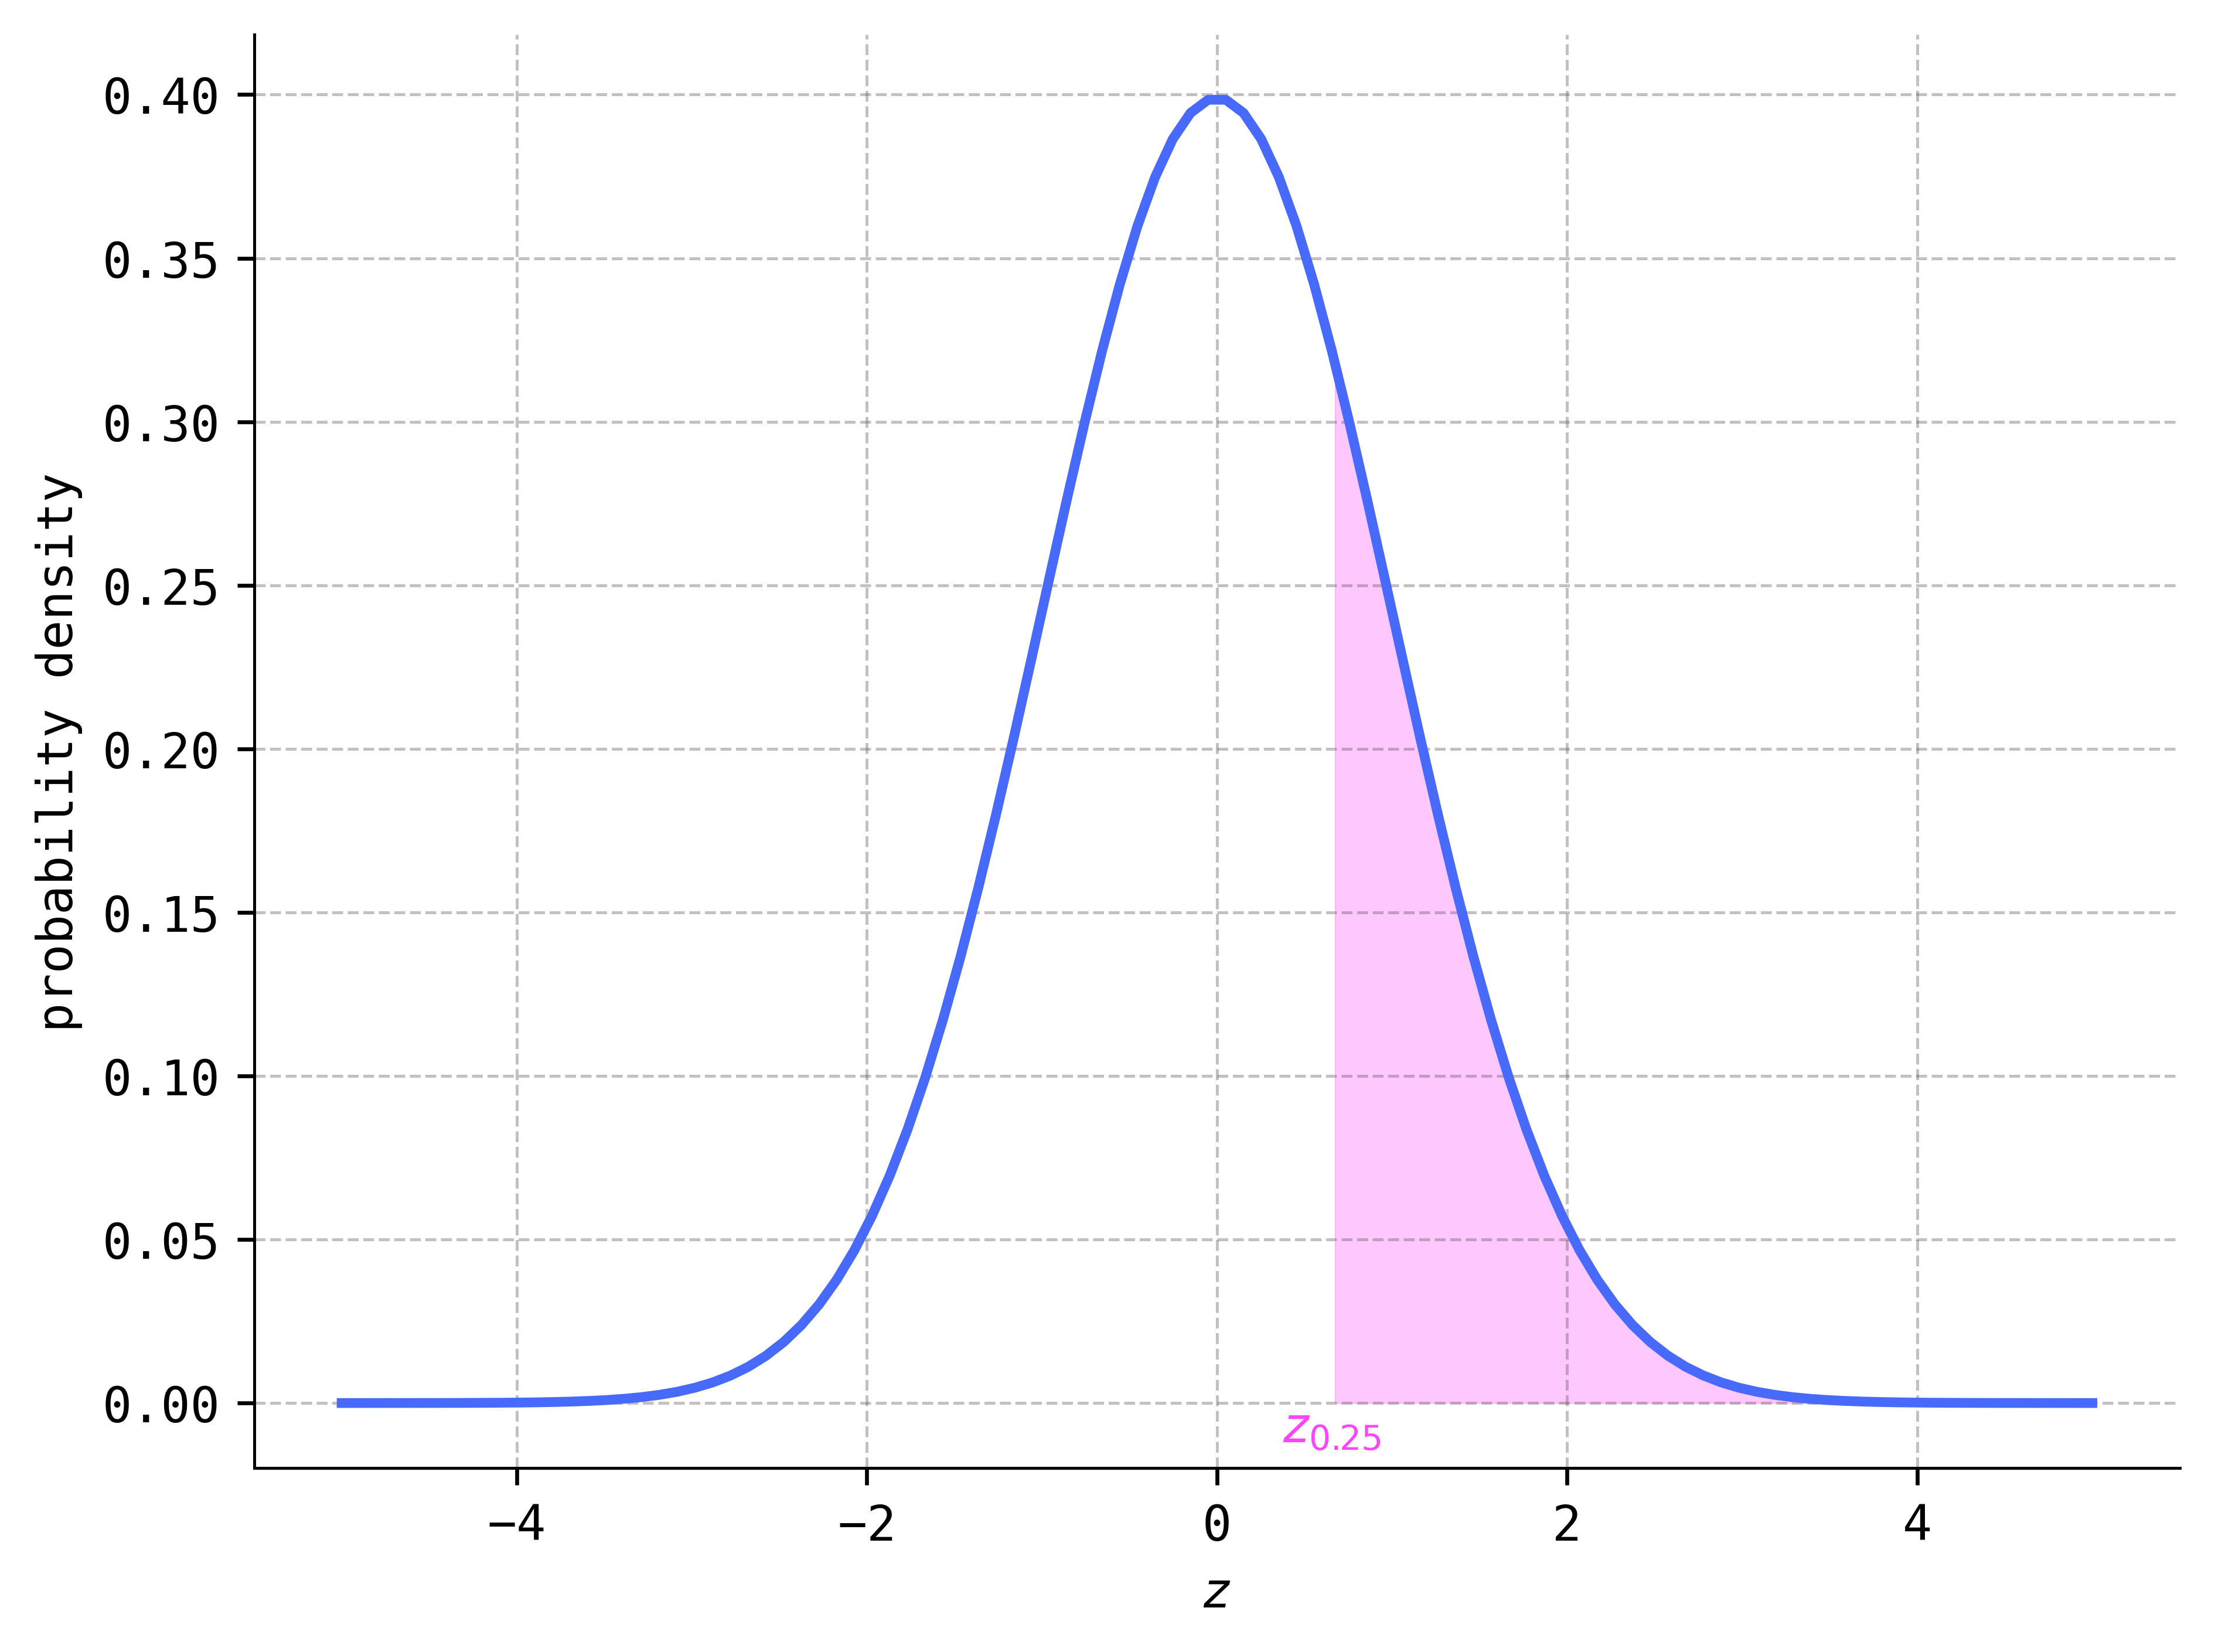

In [7]:
Z = sp.stats.norm()
support = np.linspace(-5, 5, 100)
alpha = 0.25
z_alpha = Z.ppf(1 - alpha)
short_support = np.linspace(z_alpha, 5)

plt.plot(support, Z.pdf(support))
plt.fill_between(short_support, Z.pdf(short_support), color='#FD46FC', alpha=0.3)
plt.text(z_alpha - 0.3, -0.012, r'$z_{0.25}$', color='#FD46FC')
plt.xlabel(r'$z$')
plt.ylabel('probability density')
plt.tight_layout()

Can you see where the critical value $z_{0.5}$ would be? Since the standard normal density curve is symmetric about the origin, we must have $z_{0.5}=0$ since exactly half the area lies to the right of the origin.

Now, let's formally state that the parameters of the normal distributions really are the means and standard deviations:

```{prf:theorem} Expectations and variances of normal variables
:label: exp-var-gaussian-thm

If $X\sim \mathcal{N}(\mu,\sigma^2)$, then

$$
E(X) = \mu \quad \text{and} \quad V(X) = \sigma^2.
$$
```

We will derive these formulas later in the worksheet problems to {numref}`mgf`.

```{admonition} Problem Prompt

Do problems 10-13 on the worksheet.
```











## Exponential distributions

The next family of distributions is strongly related to the discrete Poisson variables that we saw above, as well as to the _gamma distributions_ in the next section.

```{prf:definition}
:label: exponential-def

Let $\lambda>0$ be a real number. A continuous random variable $X$ is said to have an *exponential distribution* with parameter $\lambda$, denoted

$$
X \sim \mathcal{E}xp(\lambda),
$$

if its probability density function is given by

$$
f(x;\lambda) = \lambda e^{-\lambda x}
$$

with support $(0,\infty)$.
```

The effect of the parameter is clear on the graph of the density function:

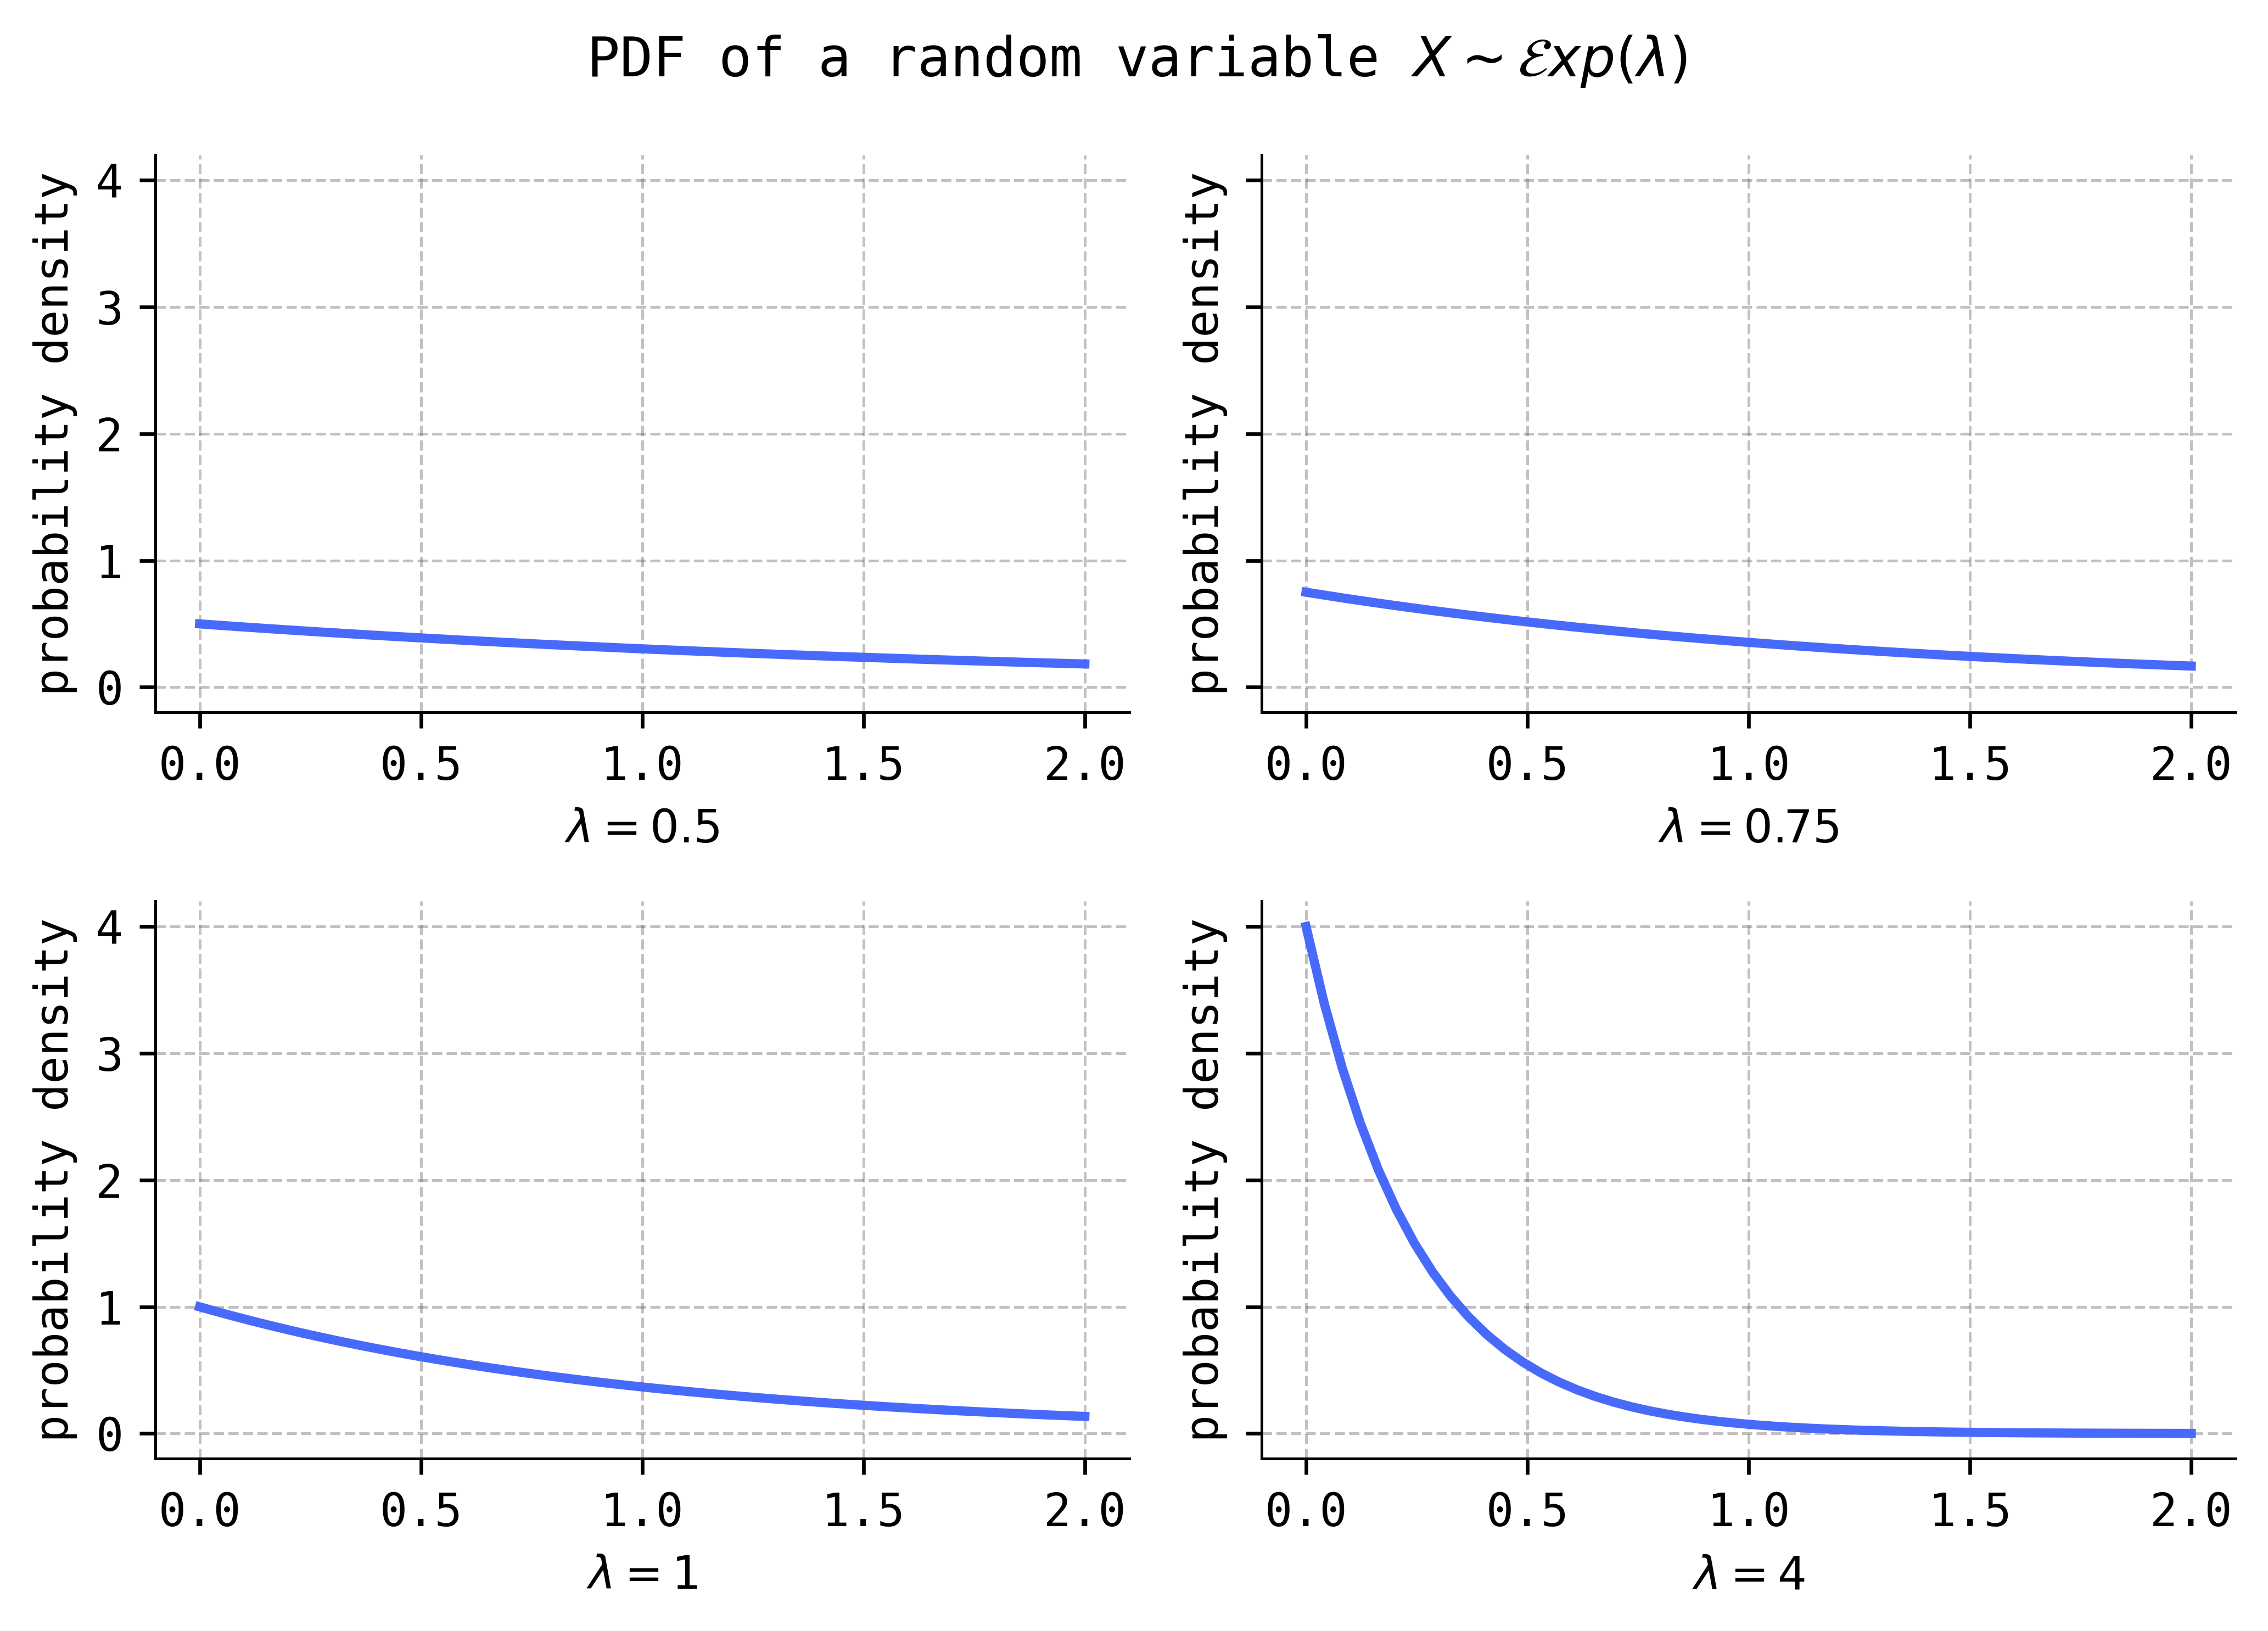

In [8]:
params = [[0.5, 0.75], [1, 4]]
support = np.linspace(0, 2)

fig, axes = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(7, 5))

for i, j in product(range(2), repeat=2):
    l = params[i][j]
    X = sp.stats.expon(scale=1 / l)
    
    axes[i, j].plot(support, X.pdf(support))
    axes[i, j].set_ylabel('probability density')
    axes[i, j].set_xlabel(rf'$\lambda={l}$')

fig.suptitle(r'PDF of a random variable $X\sim \mathcal{E}xp(\lambda)$')
plt.tight_layout()

If you examined the Python code that I wrote to produce these figures, you'll notice that $\lambda$ is _not_ a shape parameter in SciPy's implementation of an exponential variable. Rather, SciPy uses the reciprocal $\beta = 1/\lambda$ as a `scale` parameter.

The parameter $\lambda$ is often referred to as a _rate_ or _intensity parameter_. The reason for this name is made clear in the following archetypical scenario which is a continuation of the archetypical Poisson scenario described [above](poisson-scenario).

```{admonition} An archetypical exponential scenario (email scenario continued)
:name: exp-scenario

**Q**: Let $T_1,T_2,\ldots$ be the arrival times of the emails in your inbox, and suppose that they arrive at a mean rate $\lambda$ (measured in reciprocal hours). We set $I_1 = T_1$, the time of _first arrival_, and for each $k=2,3,\ldots$ the differences

$$
I_k = T_k - T_{k-1}
$$

are called *interarrival times*.

What are the distributions of the random variables $I_1,I_2,\ldots$?

**A**: $I_k\sim \mathcal{E}xp(\lambda)$ for all $k=1,2,\ldots$.
```

We shall first show that $I_1 \sim \mathcal{E}xp(\lambda)$ by proving that it has the CDF of an $\mathcal{E}xp(\lambda)$ distribution:

$$
F(t) = \int_0^t \lambda e^{-\lambda x} \ \text{d}x = 1 - e^{-\lambda t}.
$$ (cdf-exp-eqn)

To do this, notice that

$$
P(I_1 \leq t) = 1 - P(I_1 > t) = 1 - P\left( \text{no emails arrive in $[0,t]$} \right).
$$

However, we already know that the number of emails that arrive in a given time interval of length $t$ is modeled by a $\mathcal{P}ois(\lambda t)$ random variable, and so

$$
P\left( \text{no emails arrive in $[0,t]$} \right) = \frac{(\lambda t)^0}{0!}e^{-\lambda t} = e^{-\lambda t}.
$$

But then

$$
P(I_1 \leq t) = 1- e^{-\lambda t} = F(t),
$$

from which it follows that $I_1 \sim \mathcal{E}xp(\lambda)$.

We now show that $I_k\sim \mathcal{E}xp(\lambda)$ (for all $k\geq 2$) via the same method as above by proving it has CDF given by {eq}`cdf-exp-eqn`. To do this, note that

\begin{align*}
P(I_k >t | T_{k-1} = s ) &= P\left( \text{no emails arrive in $(s,s+t]$} \mid T_{k-1} = s \right) \\
&= P\left( \text{no emails arrive in $(s,s+t]$} \right) \\
&= e^{-\lambda t}
\end{align*}

for $s,t> 0$. The second equality follows from independence of the arrival times $T_1,T_2,\ldots$; indeed, the arrival time of an email should have no influence on whether an email arrives in a subsequent time interval. The third equality follows from the fact (again) that the number of emails that arrive in a time interval of length $t$ is a $\mathcal{P}ois(\lambda t)$ random variable. But independence considerations also suggest that

$$
P(I_k >t) = P(I_k >t | T_{k-1} = s )
$$

and hence

$$
P(I_k \leq t) = 1- P(I_k>t) = 1 - e^{-\lambda t} = F(t)
$$

for all $t>0$. Thus, $I_k \sim \mathcal{E}xp(\lambda)$, which completes the (plausibility) proof.

Now, before moving onto some example problems, let's state the means and variances of exponential variables:

```{margin}

If $I_k$ denotes the $k$-th arrival time in our archetypical exponential scenario, then in order for the equation $E(I_k) = 1/\lambda$ to be dimensionally correct, the rate parameter $\lambda$ _must_ be measured in reciprocal hours.
```

```{prf:theorem} Expectations and variances of exponential variables
:label: exp-var-exponential-thm

If $X\sim \mathcal{E}xp(\lambda)$, then

$$
E(X) = \frac{1}{\lambda} \quad \text{and} \quad V(X) = \frac{1}{\lambda^2}.
$$
```

We will not prove these formulas here, since they will follow from the observation that every exponential variable is a {prf:ref}`gamma variable <gam-defn>` and {prf:ref}`gam-exp-thm`.


```{admonition} Problem Prompt

Do problem 14 on the worksheet.
```

















## Gamma distributions

Normal distributions are symmetric about their means and therefore cannot model datasets that are _skew_ (i.e., non-symmetric). It is therefore of interest to have in one's toolkit a family of skew distributions; such a family is described in this section.

These distributions derive their name from the [gamma functions](https://en.wikipedia.org/wiki/Gamma_function)

$$
\Gamma(\alpha) \stackrel{\text{def}}{=} \int_0^\infty x^{\alpha-1} e^{-x} \ \text{d} x \quad (\alpha>0)
$$ (gam-func-eqn)

that appear in their PDFs.

```{prf:definition}
:label: gam-defn

Let $\alpha,\beta>0$ be real numbers. A continuous random variable $X$ is said to have a *gamma distribution* with parameters $\alpha$ and $\beta$, denoted

$$
X \sim \mathcal{G}am(\alpha,\beta),
$$

if its probability density function is given by

$$
f(x;\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} e^{-\beta x}.
$$ (gamma-pdf-eqn)

with support $(0,\infty)$.
```

How should one understand the formula {eq}`gamma-pdf-eqn` for the PDFs of gamma distributions, given that it involves the somewhat intimidating gamma function {eq}`gam-func-eqn`? Here's my advice: Don't worry about the leading factor $\beta^\alpha/\Gamma(\alpha)$ in {eq}`gamma-pdf-eqn`, and only pay attention to the "important" factor $x^{\alpha-1}e^{-\beta x}$. This advice is justified based on the observation that the factor $\beta^\alpha/\Gamma(\alpha)$ does _not_ involve the variable $x$, and is therefore a constant. In fact, it is quite common to see the PDF of a gamma distribution represented as

$$
f(x;\alpha,\beta) \propto x^{\alpha-1} e^{-\beta x},
$$ (prop-gam-eqn)

where the symbol "$\propto$" means "proportional to." By writing {eq}`prop-gam-eqn`, we are signaling that the only important part of the PDF is the factor $x^{\alpha-1} e^{-\beta x}$.

One should understand the factor $\beta^\alpha/\Gamma(\alpha)$ as a normalization factor then ensures that the PDF integrates to $1$. Indeed, note that

$$
\int_{0}^\infty x^{\alpha-1} e^{-\beta x} \ \text{d}x = \frac{1}{\beta^\alpha} \int_0^\infty u^{\alpha-1} e^{-u} \ \text{d}u = \frac{\Gamma(\alpha)}{\beta^\alpha},
$$

where we've made the substitution $u=\beta x$ in the first equality. Thus, if we want the expression $x^{\alpha-1} e^{-\beta x}$ to integate to $1$ over the support $(0,\infty)$, then we had better multiply it by the normalizing factor $\beta^\alpha / \Gamma(\alpha)$.

The PDFs look like the following, for various settings of the parameters.

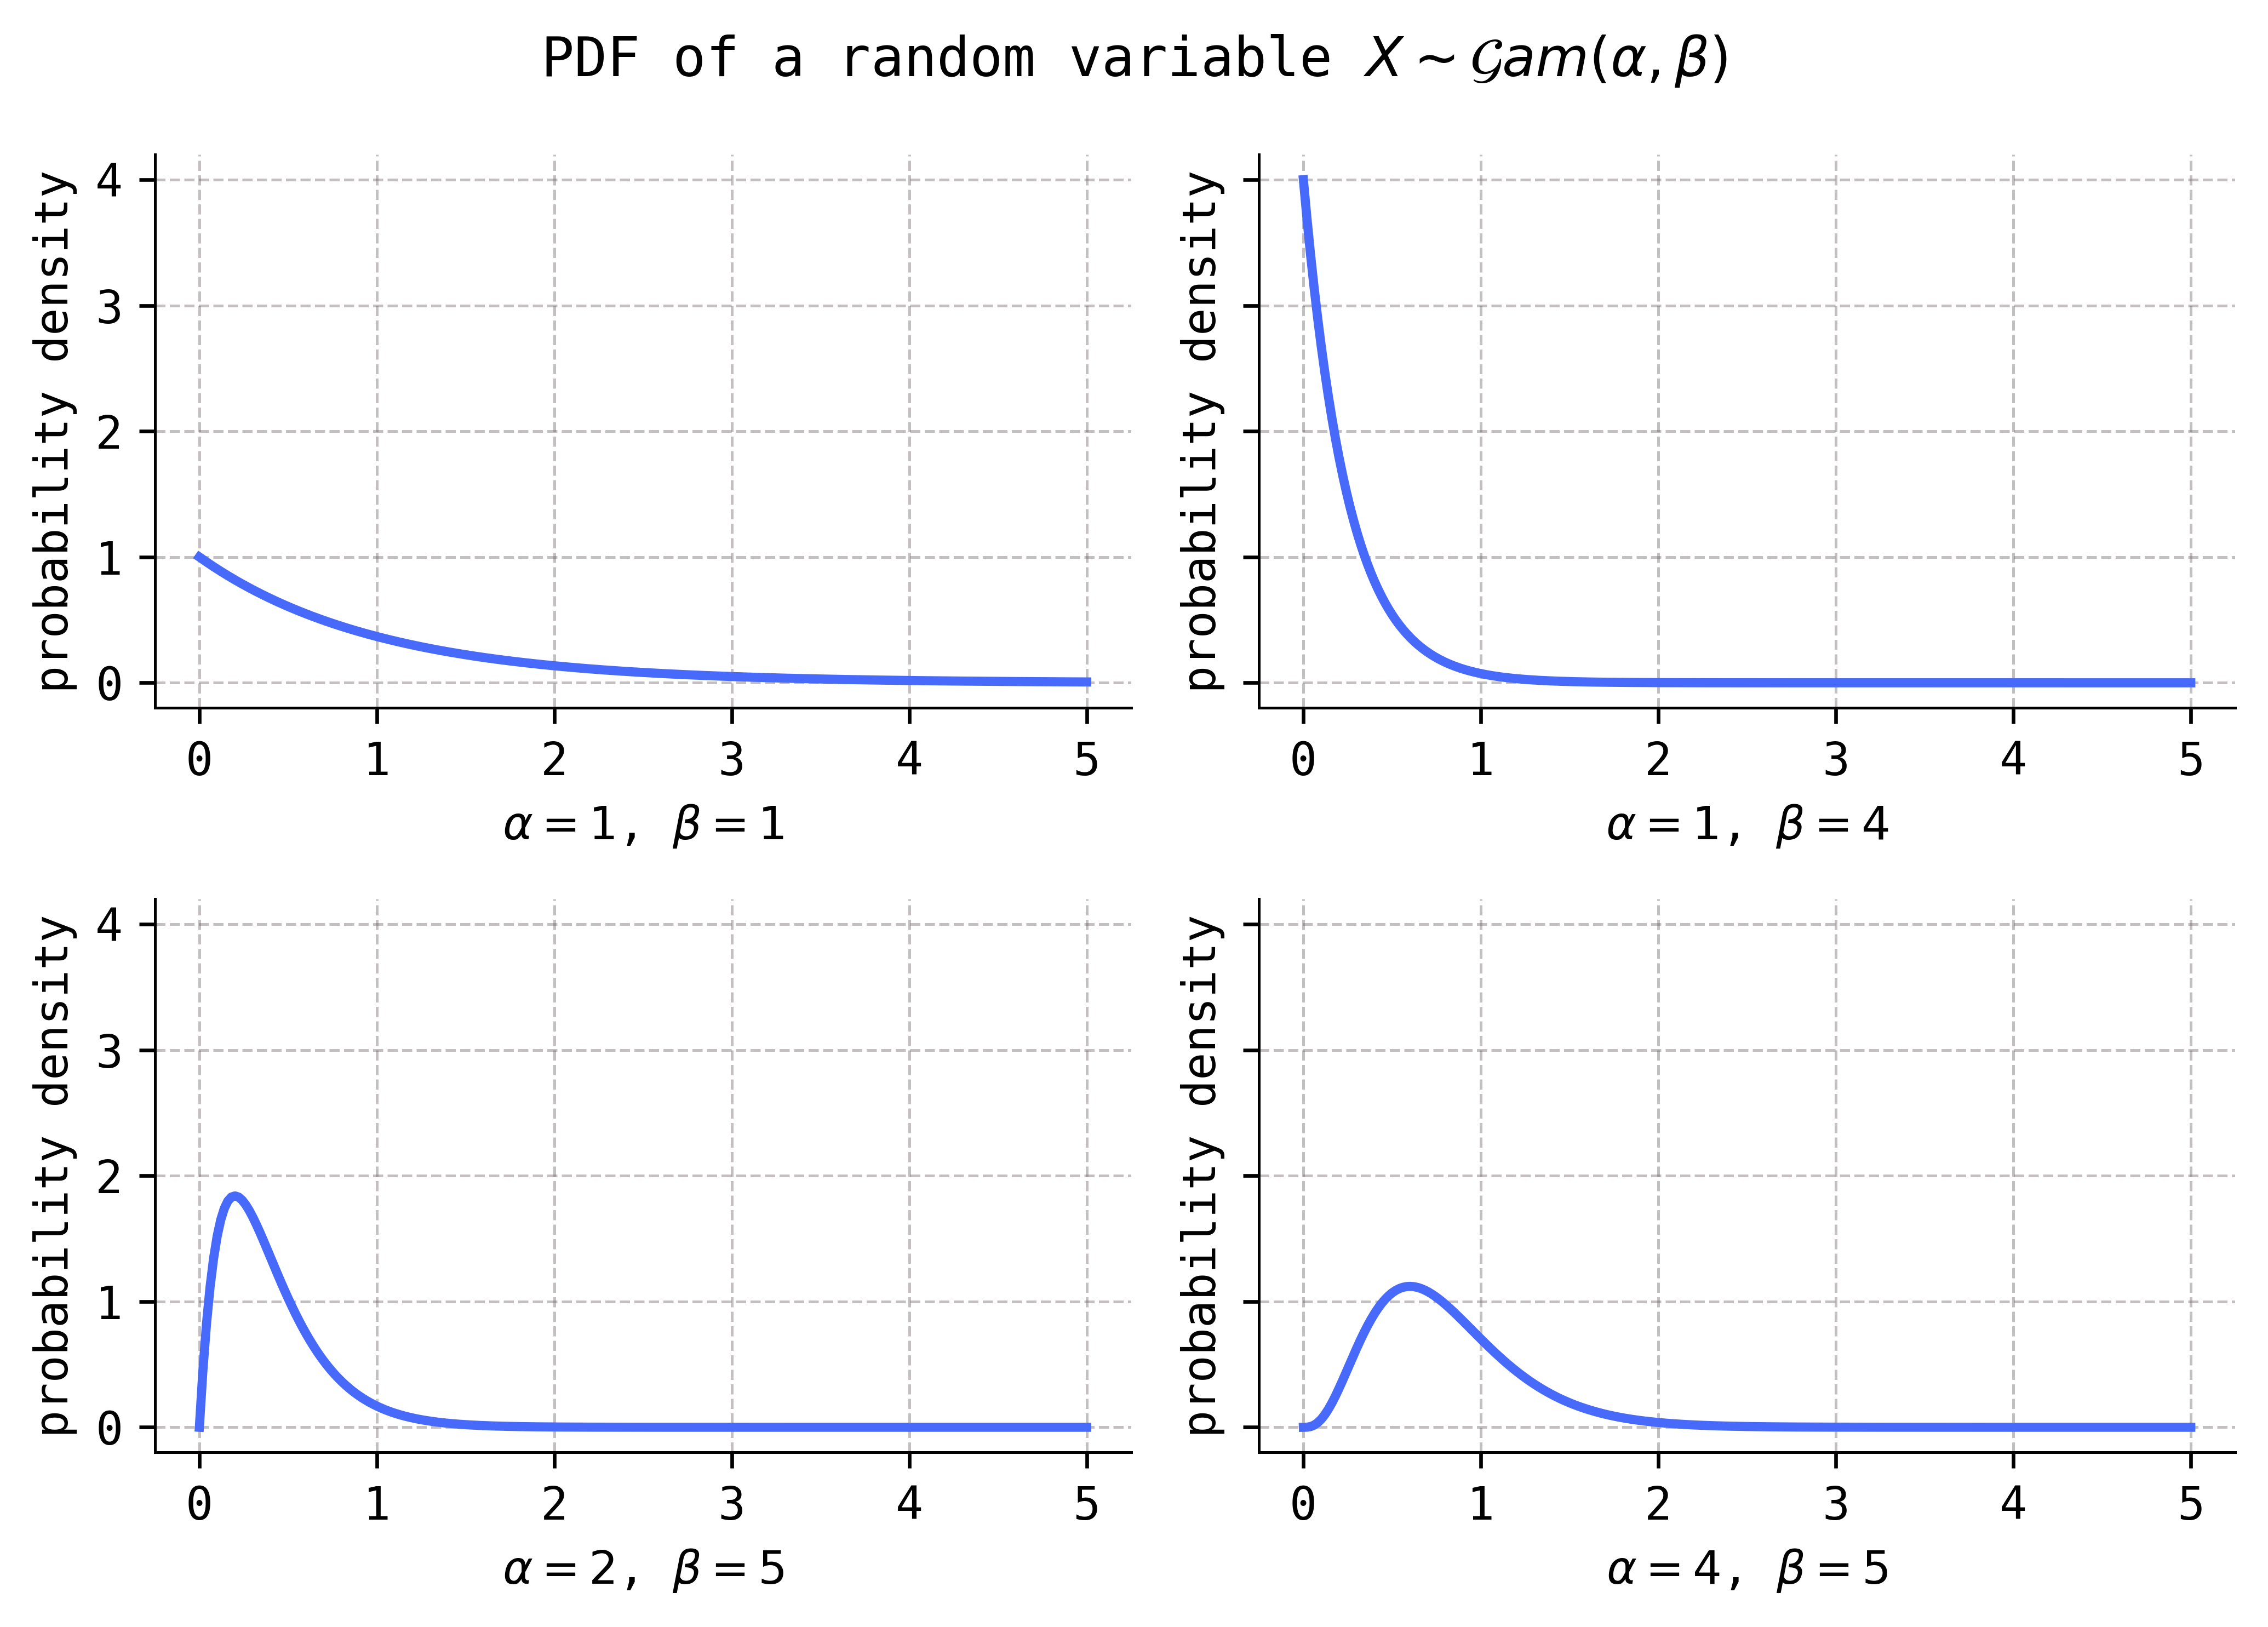

In [9]:
params = [[(1, 1), (1, 4)], [(2, 5), (4, 5)]]
support = np.linspace(0, 5, 250)

fig, axes = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(7, 5))

for i, j in product(range(2), repeat=2):
    alpha = params[i][j][0]
    b = params[i][j][1]
    X = sp.stats.gamma(a=alpha, scale=1/b)
    
    axes[i, j].plot(support, X.pdf(support))
    axes[i, j].set_ylabel('probability density')
    axes[i,j].set_xlabel(rf'$\alpha={alpha}$, $\beta={b}$')

fig.suptitle(r'PDF of a random variable $X\sim \mathcal{G}am(\alpha,\beta)$')
plt.tight_layout()

Notice that these distributions are definitely skew, i.e., non-symmetric.

If you inspect the Python code that I wrote to produce these figures, you'll notice that SciPy's implementation of gamma variables takes $\alpha$ as a _shape parameter_ called `a`, while it takes the reciprocal $1/\beta$ as a _scale parameter_ called `scale`. The parameter $\beta$ is then called a _rate parameter_.

I have decided to present the exponential distributions _first_, and _then_ the gamma distributions. This might seem a bit backwards since the former are actually special types of the latter. Indeed, by comparing PDFs, we see that

$$
\mathcal{E}xp(\lambda) = \mathcal{G}am(1,\lambda).
$$

However, I wanted us to be familiar with exponential variables so that the following scenario makes sense. (It would be worth reviewing the [Poisson](poisson-scenario) and [exponential scenarios](exp-scenario) before proceeding!)

```{admonition} An archetypical gamma scenario (email scenario continued, again)
:name: gamma-scenario

**Q**: Remember that $T_k$ (for $k=1,2,\ldots$) denotes the (random) arrival time of the $k$-th email in your inbox, and that the mean rate at which they arrive is $\lambda$ (measured in reciprocal hours). What are the distributions of the random variables $T_k$?

**A**: We have $T_k \sim \mathcal{G}am(k,\lambda)$ for all $k=1,2,\ldots$.
```

The justification follows from the fact that

$$
T_k = T_1 + (T_2 - T_1) + \cdots + (T_k - T_{k-1}) = I_1 + I_2 + \cdots + I_k,
$$

and that the $I_k$'s are independent $\mathcal{E}xp(\lambda)$ random variables. As we will see [later](mgf), it is a general fact that the sum of $k$ independent $\mathcal{E}xp(\lambda)$ variables is a $\mathcal{G}am(k,\lambda)$ variable, which implies the desired result.

It is instructive to inspect the densities of the first few $T_k$'s:

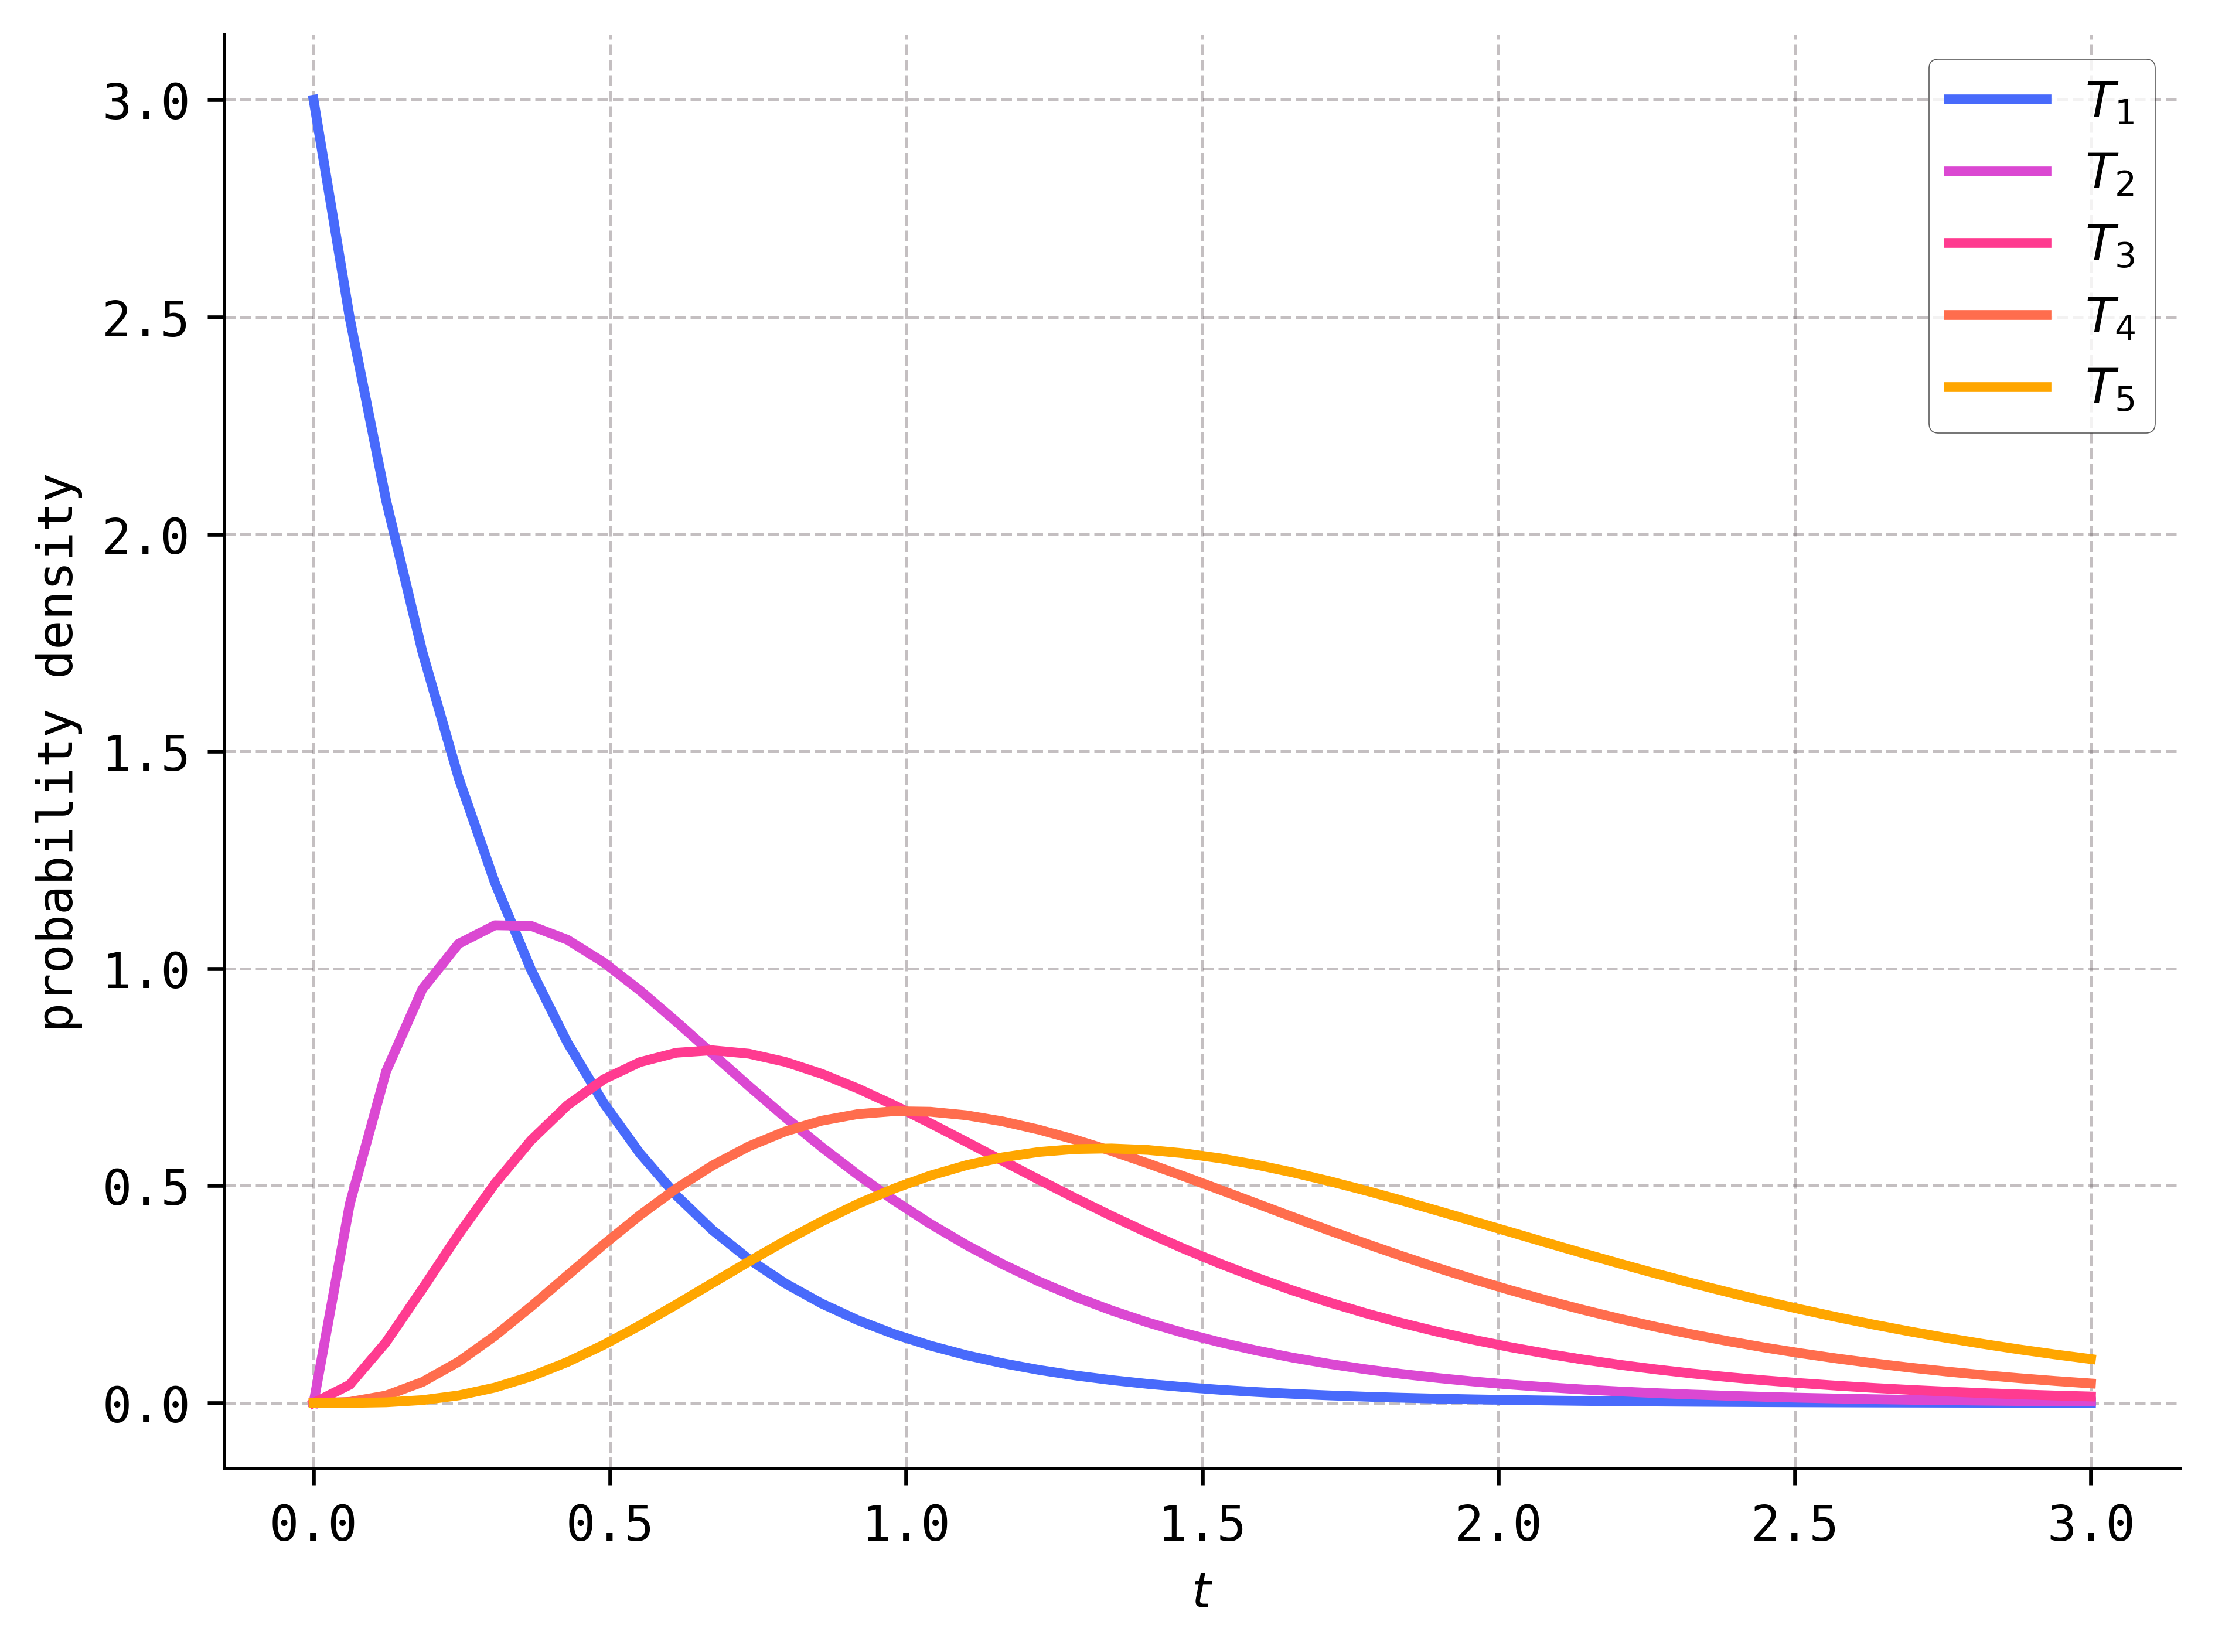

In [10]:
cycler = cycler(color=['#486afb', '#db48d2', '#ff3b90', '#ff6d4d', '#ffa600'])
plt.rc('axes', prop_cycle=cycler)

support = np.linspace(0, 3)
l = 3

for k in range(1, 6):
    T = sp.stats.gamma(a=k, scale=1 / l)
    plt.plot(support, T.pdf(support), label=rf'$T_{k}$')

plt.xlabel('$t$')
plt.ylabel('probability density')
plt.legend()
plt.tight_layout()

Notice that the majority of the "mass" of the distributions move further to the right as $k$ increases. This makes sense, as we would expect that the mean arrival time of the $(k+1)$-st email is greater than the mean arrival time of the $k$-th one.

To make this idea precise, it would be helpful to have a formula for the mean of a gamma variable. To derive such a formula, we will need the following convenient property of the gamma functions {eq}`gam-func-eqn`:

```{prf:theorem}
:label: recur-gamma-thm

If $\alpha>1$, then $\Gamma(\alpha) = (\alpha-1)\Gamma(\alpha-1)$.
```

The proof is an integration by parts applied to the definition {eq}`gam-func-eqn` with $u = x^{\alpha-1}$ and $dv = e^{-x} \ \text{d}x$. Then:

$$
\Gamma(\alpha) = -x^{\alpha-1}e^{-x} \big|_0^{\infty} + (\alpha-1) \int_0^{\infty} x^{\alpha-2}e^{-x} \ \text{d}x = (\alpha-1)\Gamma(\alpha-1).
$$

Now:

```{prf:theorem} Expectations and variances of gamma variables
:label: gam-exp-thm

If $X\sim \mathcal{G}am(\alpha,\beta)$, then

$$
E(X) = \frac{\alpha}{\beta} \quad \text{and} \quad V(X) = \frac{\alpha}{\beta^2}.
$$
```

For the proof, let $k\geq 1$ be any integer. Then:

$$
E(X^k) = \frac{\beta^\alpha}{\Gamma(\alpha)} \int_0^\infty x^k \cdot x^{\alpha-1} e^{-\beta x} \ \text{d}x = \frac{\beta^\alpha}{\Gamma(\alpha)} \int_0^\infty x^{\alpha + k -1} e^{-\beta x} \ \text{d} x.
$$

But the second integral is equal to $\Gamma(\alpha+k)/\beta^{\alpha+k}$ since it is precisely the integral that appears in the density of a $\Gamma(\alpha+k,\beta)$ distribution. Thus,

$$
E(X^k) = \frac{\beta^\alpha}{\Gamma(\alpha)} \cdot \frac{\Gamma(\alpha+k)}{\beta^{\alpha+k}} = \frac{\Gamma(\alpha+k)}{\beta^k \Gamma(\alpha)}.
$$

In particular, if we take $k=1$ and use {prf:ref}`recur-gamma-thm`, we get $E(X) = \alpha/\beta$, as desired. If we take $k=2$ and use {prf:ref}`recur-gamma-thm` twice, we get

$$
E(X^2) = \frac{\Gamma(\alpha+2)}{\beta^2\Gamma(\alpha)} = \frac{(\alpha+1)\alpha}{\beta^2}.
$$

Then,

$$
V(X) = E(X^2) - E(X)^2 = \frac{(\alpha+1)\alpha}{\beta^2} - \frac{\alpha^2}{\beta^2} = \frac{\alpha}{\beta^2},
$$

which is what we wanted to prove.



```{admonition} Problem Prompt

Do problem 15 on the worksheet.
```








## Beta distributions

All the continuous random variables studied so far have unbounded supports. However, the next type of random variables have their supports inside the open interval $(0,1)$ which makes them particularly useful for modeling proportions and probabilities. They are parametrized by $\alpha$'s and $\beta$'s just like the gamma variables, and they also have gamma functions in their PDF's.

```{prf:definition}
:label: beta-def

Let $\alpha,\beta>0$ be real numbers. A continuous random variable $X$ is said to have a *beta distribution* with parameters $\alpha$ and $\beta$, denoted

$$
X \sim \mathcal{B}eta(\alpha,\beta),
$$

if its probability density function is given by

$$
f(x;\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}.
$$

with support $(0,1)$.
```

```{margin}

It is perhaps unfortunate that the random variable _itself_ is called a _beta variable_, while $\beta$ is also one of the parameters. This has ramifications when attempting to use SciPy's implementation of beta variables since the SciPy function is called `beta`. This means that you cannot use `beta` as a variable name for parameters!
```

Just like the densities of gamma variables, the leading factor $\Gamma(\alpha+\beta)/(\Gamma(\alpha)\Gamma(\beta))$ is only there to ensure that the PDF integrates to $1$. Notice that it is independent of the variable $x$, and thus we may write

$$
f(x;\alpha,\beta) \propto x^{\alpha-1} (1-x)^{\beta-1},
$$

highlighting only the "important" part of the density.

For $\alpha,\beta>1$, notice that the density function $f(x;\alpha,\beta)$ has zeros at $x=0$ and $1$. Moreover, if $\alpha$ and $\beta$ are integers greater than $1$, then the powers $\alpha-1$ and $\beta-1$ in $f(x;\alpha,\beta)$ play the role of _multiplicities_ of these zeros. Thus, holding one of $\alpha$ or $\beta$ fixed while increasing the other one has the effect of "flattening" the density curve toward the zero whose multiplicity is increasing. You can see this "flattening" effect by comparing the plots vertically in the first two rows of the following figure; the last two rows show the density curves for fractional values of $\alpha$ and $\beta$, and for values less than $1$.

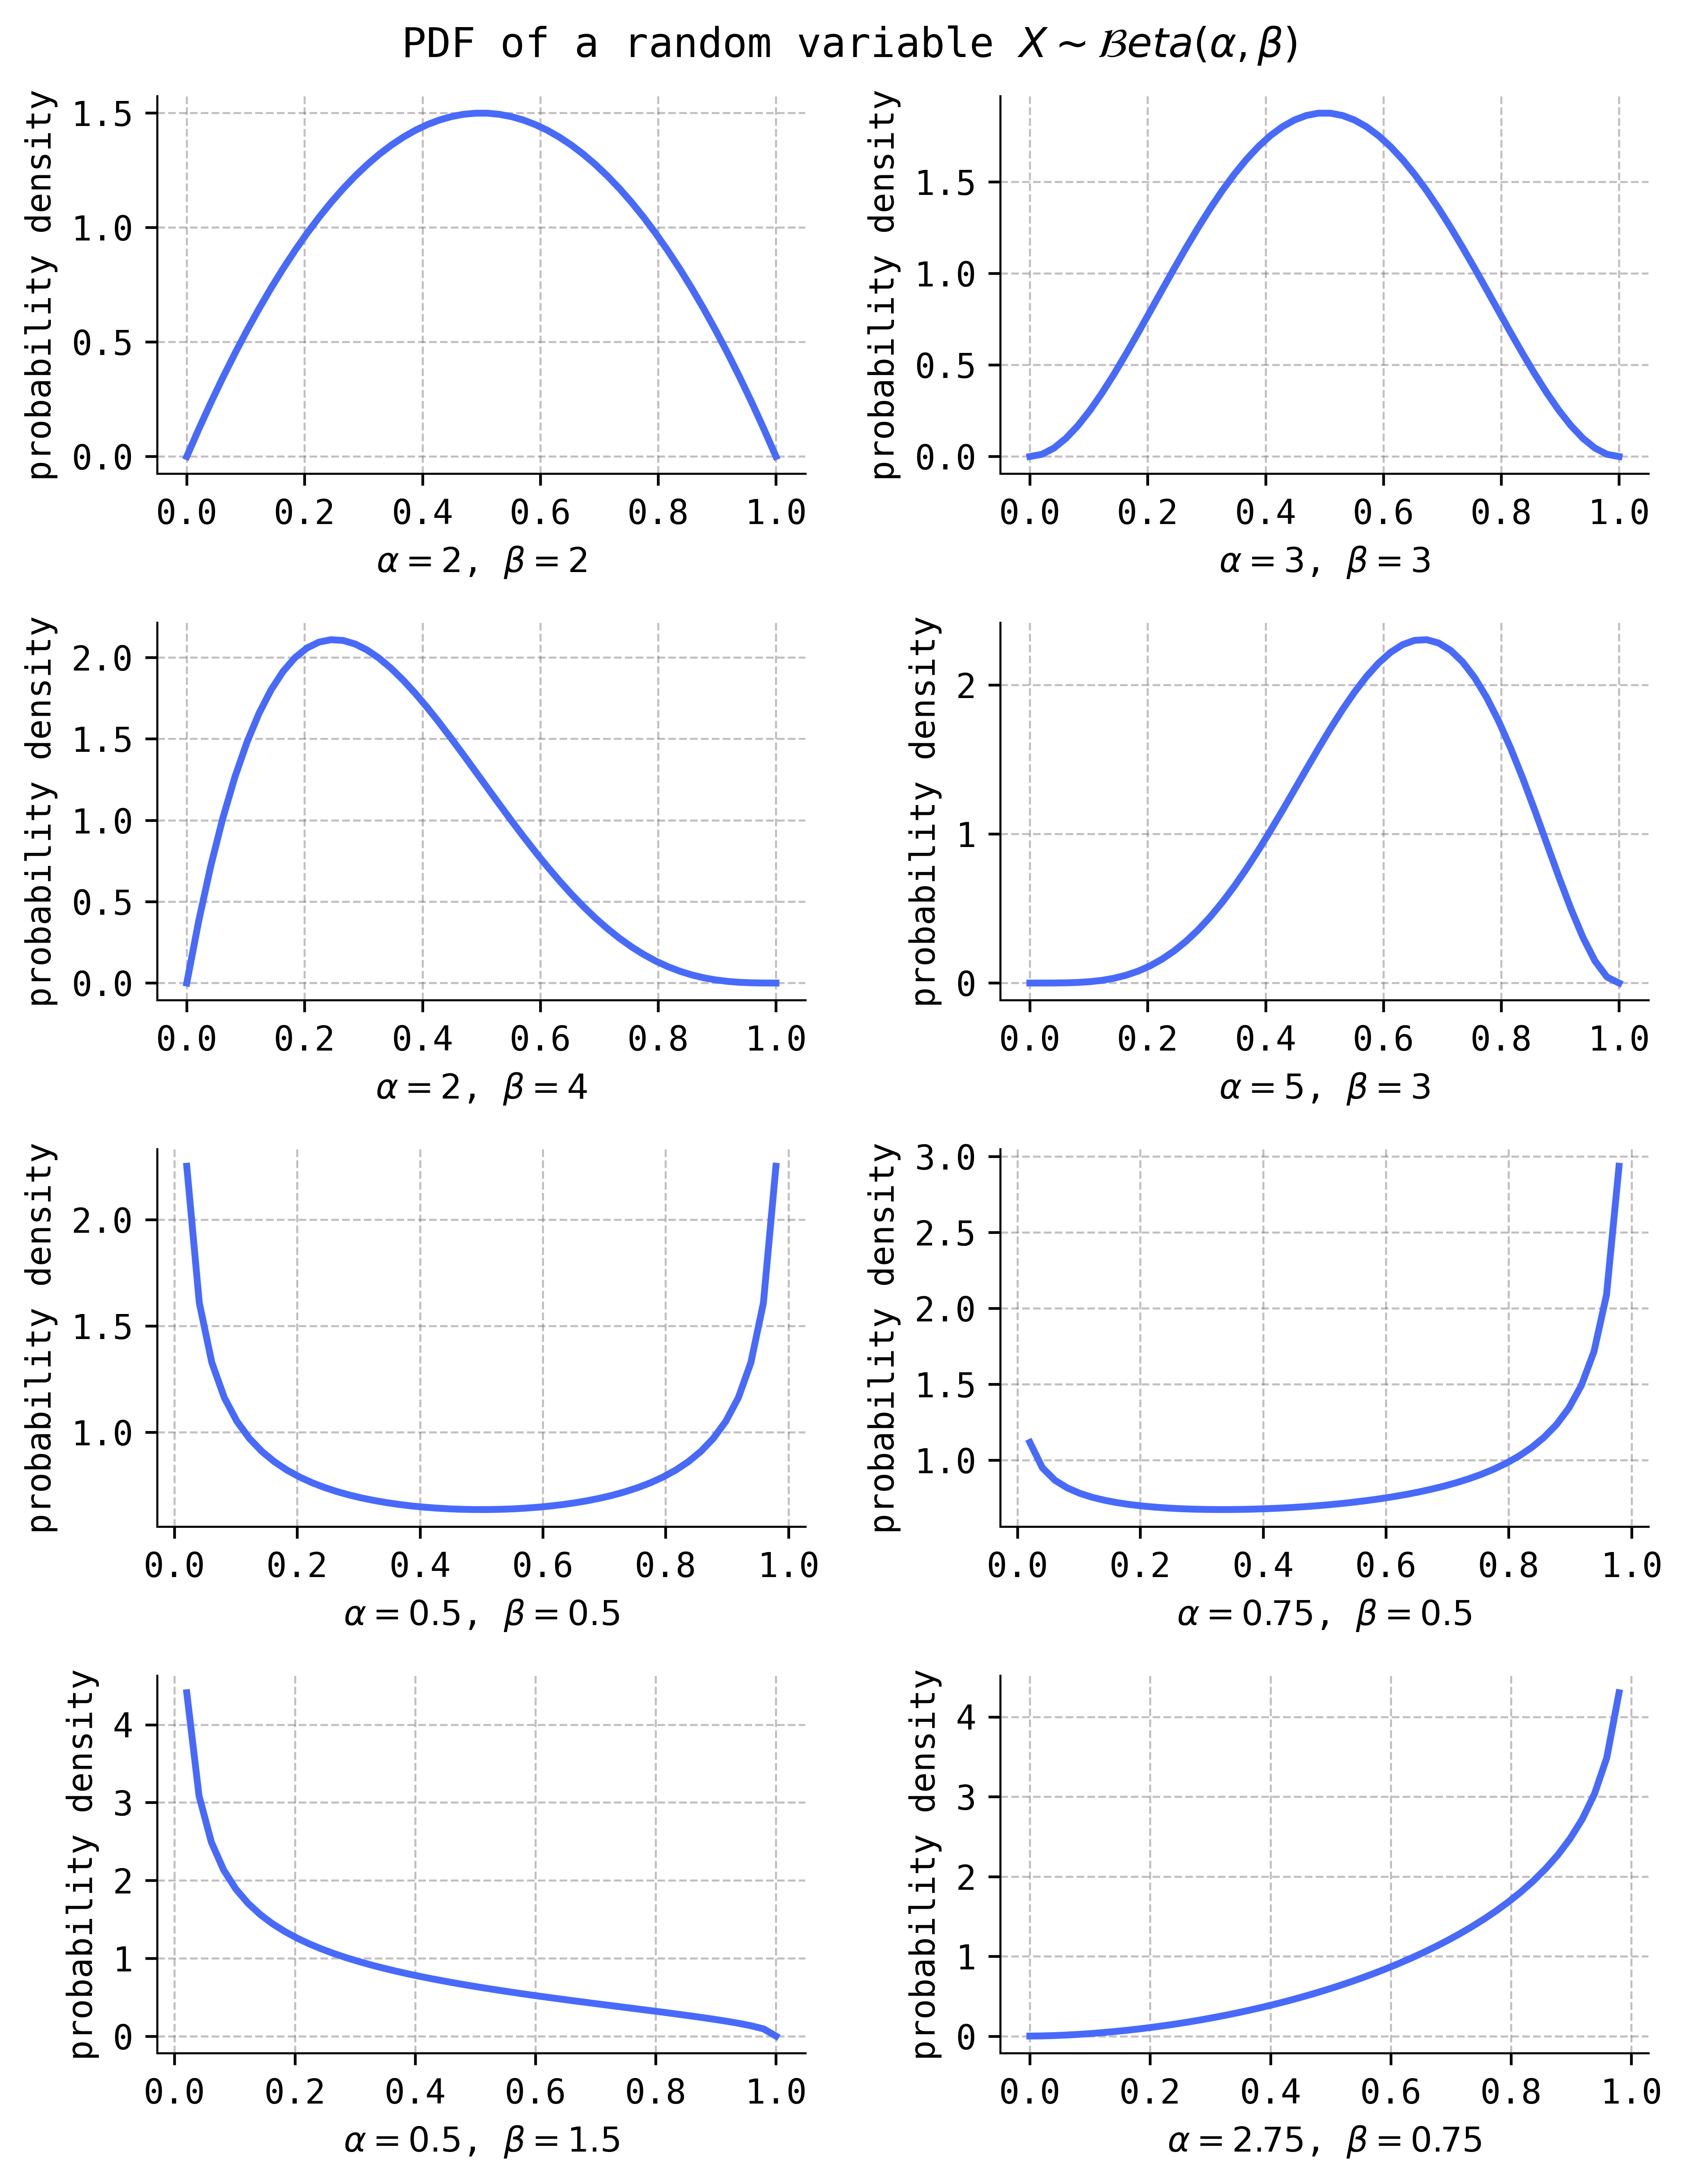

In [11]:
params = [[(2, 2), (3, 3)], [(2, 4), (5, 3)], [(0.5, 0.5), (0.75, 0.5)], [(0.5, 1.5), (2.75, 0.75)]]
support = np.linspace(0, 1)

fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(7, 9))

for i, j in product(range(4), range(2)):
    a = params[i][j][0]
    b = params[i][j][1]
    X = sp.stats.beta(a=a, b=b)
    
    axes[i, j].plot(support, X.pdf(support))
    axes[i, j].set_ylabel('probability density')
    axes[i, j].set_xlabel(rf'$\alpha={a}$, $\beta={b}$')

fig.suptitle(r'PDF of a random variable $X\sim \mathcal{B}eta(\alpha,\beta)$')
plt.tight_layout()

Notice that if either $\alpha<1$ or $\beta<1$, then the density curve has a vertical asymptote at the corresponding $x=0$ or $x=1$.

```{prf:theorem} Expectations and variances of beta variables
:label: exp-beta-thm

If $X\sim \mathcal{B}eta(\alpha,\beta)$, then

$$
E(X) = \frac{\alpha}{\alpha+\beta} \quad \text{and} \quad V(X) = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}.
$$
```

These formulas may be derived using computations very similar to those for deriving the means and variances of gamma variables in {prf:ref}`gam-exp-thm`. I suggest that you try to derive them on your own; if you have trouble, take a look at Theorem 5.8.3 in {cite}`DeGrootSchervish2014`





```{admonition} Problem Prompt

Do problem 16 on the worksheet.
```